In [1]:
import torch
from torch import nn
from torch import optim
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from nltk.classify.megam import numpy
from scipy import interp
from itertools import cycle
import time

In [2]:
import numpy as np
import os
import math
import random
import torch
# from torch.utils.tensorboard import SummaryWriter
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy import stats
import plotly.graph_objects as go

from sklearn.utils import shuffle
import torch.nn as nn
!pip install torchsummary
import matplotlib.pyplot as plt
from torchsummary import summary
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

You should consider upgrading via the '/Users/pro/Documents/Sklearn/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import seaborn
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import Adam
from torchvision import datasets, transforms

USE_CUDA = True

In [4]:
from sklearn.model_selection import KFold

In [5]:
train_set = pd.read_csv('../capsule_code/data/nc_train_0.csv', sep=' ',header=None,names=['0','1','2','3','4','5','6','label'])
train_set

,0,1,2,3,4,5,6,label
0,1.168561,-0.907673,1.168743,0.732893,-0.307202,0.578619,-0.399994,0
1,-0.064005,-1.017375,-0.965043,0.446558,-0.307202,0.437597,-0.399994,0
2,1.168561,-1.675586,-1.365127,0.160224,-0.307202,0.617291,-0.399994,7
3,1.168561,0.079644,1.168743,1.591895,-0.265008,0.862663,-0.399994,10
4,-1.296572,0.189345,-1.098404,-0.126110,-0.349396,-2.416853,-0.477236,3
...,...,...,...,...,...,...,...,...
11195,1.168561,1.615469,1.435466,0.446558,-0.349396,-0.063482,-0.399994,14
11196,1.168561,1.615469,1.435466,0.732893,-0.349396,-0.062816,-0.399994,14
11197,1.168561,1.615469,1.435466,1.019227,-0.349396,-0.062816,-0.399994,14
11198,1.168561,1.615469,1.435466,1.305561,-0.349396,-0.062482,-0.399994,14


In [6]:
test_set = pd.read_csv('../capsule_code/data/nc_test_0.csv', sep=' ',header=None,names=['0','1','2','3','4','5','6','label'])
test_set

,0,1,2,3,4,5,6,label
0,-1.296572,-0.688269,-0.831681,-0.412444,-0.307202,0.306243,-0.361374,0
1,-0.064005,-1.456182,-1.231766,-0.985112,-0.349396,-2.416853,-0.477236,3
2,1.168561,-0.578567,0.235212,-1.557780,-0.307202,0.491938,-0.361374,0
3,1.168561,-1.675586,-0.431596,-1.271446,-0.307202,0.627293,-0.399994,7
4,1.168561,-1.675586,-1.098404,1.305561,-0.307202,0.618958,-0.399994,7
...,...,...,...,...,...,...,...,...
2795,-1.296572,-0.030058,0.635296,1.019227,-0.138425,0.339581,-0.245511,12
2796,1.168561,0.847556,-1.231766,1.305561,-0.349396,-0.057481,-0.399994,11
2797,-1.296572,0.408749,0.635296,-0.412444,-0.265008,0.355584,-0.322753,0
2798,-0.064005,1.286364,-0.698319,0.732893,-0.307202,0.539946,-0.399994,0


In [7]:
# 划分训练集和验证集
train_set = shuffle(train_set)
all_train_data = shuffle(train_set)
train_data = all_train_data[['0','1','2','3','4','5','6']]
train_label = all_train_data['label']

X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_label, test_size = 0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [8]:
# 测试集
test_set = shuffle(test_set)
all_test_data = shuffle(test_set)
X_test = all_test_data[['0','1','2','3','4','5','6']]
y_test = all_test_data['label']

In [9]:
X_train, X_test, X_valid = np.array(X_train).reshape(-1, 7), np.array(X_test).reshape(-1, 7), np.array(X_valid).reshape(-1, 7)
y_train, y_test, y_valid = np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1), np.array(y_valid).reshape(-1, 1)

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train, X_valid, X_test = torch.FloatTensor(X_train), torch.FloatTensor(X_valid), torch.FloatTensor(X_test)
y_train, y_valid, y_test = torch.FloatTensor(y_train), torch.FloatTensor(y_valid), torch.FloatTensor(y_test)

In [11]:
from torch.utils.data import Dataset, DataLoader

class Dataset(Dataset):
  # 'Characterizes a dataset for PyTorch'
    def __init__(self, data, labels):
        # 'Initialization'
        self.labels = labels
        self.data = data

    def __len__(self):
        # 'Denotes the total number of samples'
        return len(self.data)

    def __getitem__(self, index):
        # 'Generates one sample of data'
        # Select sample
        return self.data[index], self.labels[index]

In [12]:
config = {
    'batch_size': 100,
    'shuffle': True,
    'drop_last': False
}

In [13]:
train_set = Dataset(X_train, y_train)
train_loader = DataLoader(
    train_set,
    batch_size=config['batch_size'],
    shuffle=config['shuffle'],
#     num_workers=config['num_workers'],
    drop_last=config['drop_last']
)

validation_set = Dataset(X_valid, y_valid)
validation_loader = DataLoader(
    validation_set,
    batch_size=config['batch_size'],
    shuffle=config['shuffle'],
#     num_workers=config['num_workers'],
    drop_last=config['drop_last']
)

test_set = Dataset(X_test, y_test)
test_loader = DataLoader(
    test_set,
    batch_size=config['batch_size'],
    shuffle=config['shuffle'],
#     num_workers=config['num_workers'],
    drop_last=config['drop_last']
)

In [16]:
class BasicConv(nn.Module):

    def __init__(self, input_channels, output_channels, stride, kernel_size, **kwargs):
        super().__init__()
        self.conv = nn.Conv1d(input_channels, output_channels,stride, kernel_size, **kwargs)
        self.bn = nn.BatchNorm1d(output_channels)
        self.relu = nn.ReLU(inplace=True)
    
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)

        return x

In [17]:
class VGG(nn.Module):

    def __init__(self, blocks, num_class=16):
        super().__init__()
        self.input_channels = 3
        self.conv1 = self._make_layers(64, blocks[0])
        self.conv2 = self._make_layers(128, blocks[1])
        self.conv3 = self._make_layers(256, blocks[2])
        self.conv4 = self._make_layers(512, blocks[3])
        self.conv5 = self._make_layers(512, blocks[4])
    
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_class)
        )

    def forward(self, x):

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
#         x = x.view(x.size(0), -1)
#         x = self.classifier(x)

        return x

    def _make_layers(self, output_channels, layer_num):
        layers = []
        while layer_num:
            layers.append(
                BasicConv(
                    self.input_channels, 
                    output_channels, 
                    stride=1,
                    kernel_size=3, 
                    padding=2, 
                    bias=False
                )
            )
            self.input_channels = output_channels
            layer_num -= 1
        layers.append(nn.MaxPool1d(1, stride=1))

        return nn.Sequential(*layers)


In [21]:
def vgg11():
    return VGG([7, 1, 2, 2, 2])

In [22]:
vgg = vgg11()
for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
    batch_data = batch_data.unsqueeze(0)
    batch_data = batch_data.permute(1,2,0)
    output = vgg(batch_data)

RuntimeError: Given groups=1, weight of size [64, 3, 1], expected input[100, 7, 1] to have 3 channels, but got 7 channels instead

In [100]:
class AlexNet(nn.Module):

    def __init__(self, num_classes=16):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv1d(7, 64, kernel_size=2, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=1),
            nn.Conv1d(64, 192, kernel_size=2, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=1),
            nn.Conv1d(192, 384, kernel_size=2, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv1d(384, 256, kernel_size=2, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv1d(256, 256, kernel_size=2, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool1d(kernel_size=2, stride=1),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 3, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(256, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 *3)
        x = self.classifier(x)
        return x

In [101]:
alexnet = AlexNet()
for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
    batch_data = batch_data.unsqueeze(0)
    batch_data = batch_data.permute(1,2,0)
    output = alexnet(batch_data)

In [102]:
output.shape

torch.Size([100, 16])

In [103]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv1d(7, 64, kernel_size=(2,), stride=(1,), padding=(1,))
    (1): ReLU(inplace=True)
    (2): MaxPool1d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (3): Conv1d(64, 192, kernel_size=(2,), stride=(1,), padding=(1,))
    (4): ReLU(inplace=True)
    (5): MaxPool1d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (6): Conv1d(192, 384, kernel_size=(2,), stride=(1,), padding=(1,))
    (7): ReLU(inplace=True)
    (8): Conv1d(384, 256, kernel_size=(2,), stride=(1,), padding=(1,))
    (9): ReLU(inplace=True)
    (10): Conv1d(256, 256, kernel_size=(2,), stride=(1,), padding=(1,))
    (11): ReLU(inplace=True)
    (12): MaxPool1d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=768, out_features=256, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_

In [104]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
def One_hot(labels):
    num_class=16
    lb=LabelBinarizer().fit(np.array(range(num_class)))
    labels=lb.transform(labels)
    return labels

In [105]:
criterion = nn.CrossEntropyLoss()  #使用交叉熵作为损失函数
optimizer = torch.optim.Adam(alexnet.parameters(), lr=0.001)
num_epochs = 50
num_classes = 16

In [106]:
def train(cnn, criterion, optimizer, 
          n_epochs):
    '''Trains a capsule network and prints out training batch loss statistics.
       Saves model parameters if *validation* loss has decreased.
       param capsule_net: trained capsule network
       param criterion: capsule loss function
       param optimizer: optimizer for updating network weights
       param n_epochs: number of epochs to train for
       param print_every: batches to print and save training loss, default = 100
       return: list of recorded training losses
       '''

    # track training loss over time
    train_losses = []
    valid_losses = []
    trainAcc1, trainAcc2, trainAcc3, trainAcc4, trainAcc5 = [], [], [], [], []
    valAcc1, valAcc2, valAcc3, valAcc4, valAcc5 = [], [], [], [], []
    trainPre, trainRecall, trainf1 = [],[],[]
    valPre, valRecall, valf1 = [],[],[]
    # one epoch = one pass over all training data 
    for epoch in range(1, n_epochs+1):
        print("-------第 {} 轮训练开始-------".format(epoch))
        '''
        使用训练集训练
        '''
        # initialize training loss
        train_loss = 0.0
        train_acc = 0.0
        train_accs = []
        cnn.train() # set to train mode
        train_preds = []
        train_trues = []
        correct_5 = 0.0
        correct_4 = 0.0
        correct_2 = 0.0
        correct_3 = 0.0
        correct_1 = 0.0
        count = 0
        train_acc_1, train_acc_2, train_acc_3, train_acc_4, train_acc_5 = 0.0, 0.0 ,0.0, 0.0, 0.0
        # get batches of training image data and targets
        for batch_i, (batch_data, batch_labels) in enumerate(train_loader):
        
#             print("batch_labels:", batch_labels)
            batch_data = batch_data.unsqueeze(0)
            batch_data = batch_data.permute(1,2,0)
            batch_labels = batch_labels.squeeze()
#             batch_labels = One_hot(batch_labels)
            # 转tensor，batch_labels: torch.Size([32, 16])
            batch_labels = batch_labels.type(torch.LongTensor)
            
            # zero out gradients
            optimizer.zero_grad()
            # get model outputs
            # logits为输出的各标签概率值
            logits = cnn(batch_data)

            # calculate loss
            loss = criterion(logits, batch_labels)
#             loss = CapsuleLoss(batch_data, batch_labels, logits, reconstruction)
#             loss = CNNLoss(batch_data, batch_labels, logits, reconstruction)
            # perform backpropagation and optimization
            loss.backward()
            optimizer.step()

            train_loss += loss.item() # accumulated training loss
            
            batch_labels = One_hot(batch_labels)
            batch_labels = torch.from_numpy(batch_labels)
            # 根据概率值对标签进行排序
            # 计算topk准确率，k=1-5
            _, pred = logits.topk(5, 1, largest=True, sorted=True)
            _, labels = torch.max(batch_labels.data.cpu(), 1)
            labels = labels.view(labels.size(0), -1).expand_as(pred)
            count += labels.shape[0]
            correct = pred.eq(labels).float()
#             print("correct:", correct)
            correct_5 += correct[:, :5].sum()
#             print("correct_5:", correct_5)
            correct_4 += correct[:, :4].sum()
#             print("correct_4:", correct_4)
            correct_3 += correct[:, :3].sum()
#             print("correct_3:", correct_3)
            correct_2 += correct[:, :2].sum()
#             print("correct_2:", correct_2)
            correct_1 += correct[:, :1].sum()
#             print("correct_1:", correct_1)
            
            _, train_outputs = torch.max(logits.data.cpu(), 1)
#             print("train_outputs:", train_outputs)
            _, batch_labels = torch.max(batch_labels.data.cpu(), 1)
#             print("batch_labels:", batch_labels)
            train_trues.append(batch_labels.cpu().detach().numpy())
            train_preds.append(train_outputs.cpu().detach().numpy())
        
            accuracy =(train_outputs.data.numpy() == batch_labels.data.numpy()).astype(int).sum()/float(batch_labels.numpy().size)
#             print("accuracy:", accuracy)
            train_accs.append(accuracy)

        train_acc1 = correct_1/count
        train_acc2 = correct_2/count
        train_acc3 = correct_3/count
        train_acc4 = correct_4/count
        train_acc5 = correct_5/count
        
        trainAcc1.append(train_acc1)
        trainAcc2.append(train_acc2)
        trainAcc3.append(train_acc3)
        trainAcc4.append(train_acc4)
        trainAcc5.append(train_acc5)
        
        y_true = np.concatenate(train_trues)
        y_pred = np.concatenate(train_preds)
        
#         ans = classification_report(y_true, y_pred,digits=5) # 小数点后保留5位有效数字
#         print("训练集各标签分类情况：", ans)
        
        precision, recall, f1 = precision_recall_fscore_support(y_true,y_pred,average='macro')[:-1]
        
        trainPre.append(precision)
        trainRecall.append(recall)
        trainf1.append(f1)
        
        # train_outputs和batch_labels输出值是什么
        # 加一个AUC
        # 查一下accuracy_score这几个。
        # 设置模式，是2分类还是多分类
        # 图像显示
        
        '''
        使用验证集验证
        '''
        cnn.eval()
        val_loss = 0.0
        val_accs = []
        val_acc = 0.0
        val_trues, val_preds = [],[]
        val_correct = 0.0
        val_correct5 = 0.0
        val_correct4 = 0.0
        val_correct2 = 0.0
        val_correct3 = 0.0
        val_correct1 = 0.0
        
        val_count = 0
        val_acc1, val_acc2, val_acc3, val_acc4, val_acc5 = 0.0, 0.0 ,0.0, 0.0, 0.0
        
        for val_i, (val_data, val_labels) in enumerate(validation_loader):
            
            val_data = val_data.unsqueeze(0)
            val_data = val_data.permute(1,2,0)
            val_labels = val_labels.squeeze()
            # 转tensor，batch_labels: torch.Size([32, 16])
            val_labels = val_labels.type(torch.LongTensor)
            # get model outputs
            logits = cnn(val_data)
            
            # calculate loss
            val_losses = criterion(logits, val_labels)
#             val_losses = CNNLoss(val_data, val_labels , logits, reconstruction)

            val_loss += val_losses.item() # accumulated training loss
            
            val_labels = One_hot(val_labels)
            val_labels = torch.from_numpy(val_labels)
            # 计算topk准确率，k=1-5
            _, pred = logits.topk(5, 1, largest=True, sorted=True)
            _, labels = torch.max(val_labels.data.cpu(), 1)
            labels = labels.view(labels.size(0), -1).expand_as(pred)
            
            val_count += labels.shape[0]
            
            val_correct = pred.eq(labels).float()
            val_correct5 += val_correct[:, :5].sum()
            val_correct4 += val_correct[:, :4].sum()
            val_correct3 += val_correct[:, :3].sum()
            val_correct2 += val_correct[:, :2].sum()
            val_correct1 += val_correct[:, :1].sum()
            
            _, val_output = torch.max(logits.data.cpu(), 1)
#             print("train_outputs:", train_outputs)
            _, val_label = torch.max(val_labels.data.cpu(), 1)
#             print("batch_labels:", batch_labels)
            val_trues.append(val_label.cpu().detach().numpy())
            val_preds.append(val_output.cpu().detach().numpy())
            
            
            

        val_acc1 = val_correct1/val_count
        val_acc2 = val_correct2/val_count
        val_acc3 = val_correct3/val_count
        val_acc4 = val_correct4/val_count
        val_acc5 = val_correct5/val_count
        
        valAcc1.append(val_acc1)
        valAcc2.append(val_acc2)
        valAcc3.append(val_acc3)
        valAcc4.append(val_acc4)
        valAcc5.append(val_acc5)
        
        y_val_true = np.concatenate(val_trues)
        y_val_pred = np.concatenate(val_preds)
        
#         val_ans = classification_report(y_val_true, y_val_pred,digits=5) # 小数点后保留5位有效数字
#         print("验证集各标签分类情况：", val_ans)
        
        val_precision, val_recall, val_f1 = precision_recall_fscore_support(y_val_true,y_val_pred,average='macro')[:-1]
#         val_AUC = roc_auc_score(y_val_true, y_val_preds, multi_class='ovo')
        
        valPre.append(val_precision)
        valRecall.append(val_recall)
        valf1.append(val_f1)
    
        train_loss = train_loss/len(train_loader)
        train_loss = train_loss/100.0
        train_losses.append(train_loss)
        val_loss = val_loss/ len(validation_loader)
        val_loss = val_loss/100.0
        valid_losses.append(val_loss)
        print('train Loss: {:.4f} \t valid Loss: {:.4f}'.format(train_loss, val_loss))
        print('train acc1: {:.4f} \t valid acc1: {:.4f}'.format(train_acc1, val_acc1))
        print('train acc2: {:.4f} \t valid acc2: {:.4f}'.format(train_acc2, val_acc2))
        print('train acc3: {:.4f} \t valid acc3: {:.4f}'.format(train_acc3, val_acc3))
        print('train acc4: {:.4f} \t valid acc4: {:.4f}'.format(train_acc4, val_acc4))
        print('train acc5: {:.4f} \t valid acc5: {:.4f}'.format(train_acc5, val_acc5))
        print('train precision: {:.4f} \t valid precision: {:.4f}'.format(precision, val_precision))
        print('train recall: {:.4f} \t valid recall: {:.4f}'.format(recall, val_recall))
        print('train f1-score: {:.4f} \t valid f1-score: {:.4f}'.format(f1, val_f1))
    
    # 画出训练损失和验证损失曲线
    x= range(n_epochs)
    plt.plot(x, train_losses, color='coral', label='Training loss')
    plt.plot(x, valid_losses, color='#054E9F', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # 画出训练集topk准确率
    plt.plot(x, trainAcc1, color='coral', label='Training acc1')
    plt.plot(x, trainAcc2, color='#054E9F', label='Training acc2')
    plt.plot(x, trainAcc3, color='#CD853F', label='Training acc3')
    plt.plot(x, trainAcc4, color='#FFC0CB', label='Training acc4')
    plt.plot(x, trainAcc5, color='#4169E1', label='Training acc5')
    plt.title('Training top5 acc')
    plt.xlabel('Epoch')
    plt.ylabel('top5 acc')
    plt.legend()
    plt.show()
    
    # 画出验证集topk准确率
    plt.plot(x, valAcc1, color='coral', label='validation acc1')
    plt.plot(x, valAcc2, color='#054E9F', label='validation acc2')
    plt.plot(x, valAcc3, color='#CD853F', label='validation acc3')
    plt.plot(x, valAcc4, color='#FFC0CB', label='validation acc4')
    plt.plot(x, valAcc5, color='#4169E1', label='validation acc5')
    plt.title('validation top5 acc')
    plt.xlabel('Epoch')
    plt.ylabel('top5 acc')
    plt.legend()
    plt.show()
    
    # 画出训练集和验证集的precision\recall\f1-score
    plt.plot(x, trainPre, color='coral', label='Training precision')
    plt.plot(x, valPre, color='#054E9F', label='Validation precision')
    plt.title('Training and validation precision')
    plt.xlabel('Epoch')
    plt.ylabel('precision')
    plt.legend()
    plt.show()
    
    # 画出训练集和验证集的precision\recall\f1-score
    plt.plot(x, trainRecall, color='coral', label='Training Recall')
    plt.plot(x, valRecall, color='#054E9F', label='Validation Recall')
    plt.title('Training and validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.show()
    
    # 画出训练集和验证集的precision\recall\f1-score
    plt.plot(x, trainf1, color='coral', label='Training f1-score')
    plt.plot(x, valRecall, color='#054E9F', label='Validation f1-score')
    plt.title('Training and validation f1-score')
    plt.xlabel('Epoch')
    plt.ylabel('f1-score')
    plt.legend()
    plt.show()
    
#         print('train AUC: {:.4f} \t valid AUC: {:.4f}'.format(AUC, val_AUC))

### fold0(train) 

1637242816.305151
-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0194 	 valid Loss: 0.0149
train acc1: 0.4907 	 valid acc1: 0.5425
train acc2: 0.5379 	 valid acc2: 0.6171
train acc3: 0.5873 	 valid acc3: 0.6718
train acc4: 0.6318 	 valid acc4: 0.7457
train acc5: 0.6780 	 valid acc5: 0.8111
train precision: 0.1096 	 valid precision: 0.0489
train recall: 0.0785 	 valid recall: 0.1250
train f1-score: 0.0609 	 valid f1-score: 0.0646
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0153 	 valid Loss: 0.0144
train acc1: 0.5264 	 valid acc1: 0.5475
train acc2: 0.5968 	 valid acc2: 0.6207
train acc3: 0.6706 	 valid acc3: 0.6939
train acc4: 0.7392 	 valid acc4: 0.7664
train acc5: 0.8054 	 valid acc5: 0.8521
train precision: 0.0913 	 valid precision: 0.1310
train recall: 0.1274 	 valid recall: 0.1275
train f1-score: 0.0871 	 valid f1-score: 0.0818
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0138 	 valid Loss: 0.0125
train acc1: 0.5746 	 valid acc1: 0.5943
train acc2: 0.6787 	 valid acc2: 0.7229
train acc3: 0.7631 	 valid acc3: 0.8114
train acc4: 0.8192 	 valid acc4: 0.8718
train acc5: 0.8750 	 valid acc5: 0.9182
train precision: 0.2290 	 valid precision: 0.2892
train recall: 0.2303 	 valid recall: 0.3489
train f1-score: 0.2110 	 valid f1-score: 0.2754
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0120 	 valid Loss: 0.0109
train acc1: 0.6318 	 valid acc1: 0.6843
train acc2: 0.7481 	 valid acc2: 0.7696
train acc3: 0.8273 	 valid acc3: 0.8371
train acc4: 0.8729 	 valid acc4: 0.8839
train acc5: 0.9130 	 valid acc5: 0.9214
train precision: 0.3627 	 valid precision: 0.4665
train recall: 0.3675 	 valid recall: 0.4787
train f1-score: 0.3609 	 valid f1-score: 0.4486
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0111 	 valid Loss: 0.0100
train acc1: 0.6567 	 valid acc1: 0.6946
train acc2: 0.7782 	 valid acc2: 0.8046
train acc3: 0.8486 	 valid acc3: 0.8611
train acc4: 0.8980 	 valid acc4: 0.9204
train acc5: 0.9348 	 valid acc5: 0.9564
train precision: 0.4153 	 valid precision: 0.4792
train recall: 0.4221 	 valid recall: 0.4915
train f1-score: 0.4135 	 valid f1-score: 0.4780
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0103 	 valid Loss: 0.0095
train acc1: 0.6785 	 valid acc1: 0.6939
train acc2: 0.7969 	 valid acc2: 0.8168
train acc3: 0.8704 	 valid acc3: 0.8943
train acc4: 0.9262 	 valid acc4: 0.9346
train acc5: 0.9575 	 valid acc5: 0.9604
train precision: 0.4532 	 valid precision: 0.4908
train recall: 0.4624 	 valid recall: 0.4818
train f1-score: 0.4528 	 valid f1-score: 0.4756
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0100 	 valid Loss: 0.0097
train acc1: 0.6862 	 valid acc1: 0.6950
train acc2: 0.8051 	 valid acc2: 0.8125
train acc3: 0.8837 	 valid acc3: 0.8871
train acc4: 0.9307 	 valid acc4: 0.9350
train acc5: 0.9630 	 valid acc5: 0.9611
train precision: 0.4745 	 valid precision: 0.4934
train recall: 0.4827 	 valid recall: 0.4781
train f1-score: 0.4750 	 valid f1-score: 0.4751
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0097 	 valid Loss: 0.0089
train acc1: 0.6920 	 valid acc1: 0.7050
train acc2: 0.8149 	 valid acc2: 0.8329
train acc3: 0.8913 	 valid acc3: 0.9104
train acc4: 0.9417 	 valid acc4: 0.9550
train acc5: 0.9664 	 valid acc5: 0.9718
train precision: 0.5176 	 valid precision: 0.4702
train recall: 0.4947 	 valid recall: 0.4971
train f1-score: 0.4875 	 valid f1-score: 0.4778
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0094 	 valid Loss: 0.0090
train acc1: 0.6968 	 valid acc1: 0.7093
train acc2: 0.8160 	 valid acc2: 0.8218
train acc3: 0.8940 	 valid acc3: 0.8921
train acc4: 0.9450 	 valid acc4: 0.9493
train acc5: 0.9679 	 valid acc5: 0.9729
train precision: 0.5432 	 valid precision: 0.5259
train recall: 0.5066 	 valid recall: 0.5294
train f1-score: 0.4996 	 valid f1-score: 0.5209
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0091 	 valid Loss: 0.0091
train acc1: 0.7083 	 valid acc1: 0.6868
train acc2: 0.8231 	 valid acc2: 0.8221
train acc3: 0.9019 	 valid acc3: 0.8918
train acc4: 0.9524 	 valid acc4: 0.9496
train acc5: 0.9726 	 valid acc5: 0.9696
train precision: 0.5922 	 valid precision: 0.4963
train recall: 0.5319 	 valid recall: 0.5753
train f1-score: 0.5277 	 valid f1-score: 0.5225
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0086 	 valid Loss: 0.0080
train acc1: 0.7113 	 valid acc1: 0.7189
train acc2: 0.8332 	 valid acc2: 0.8496
train acc3: 0.9096 	 valid acc3: 0.9175
train acc4: 0.9599 	 valid acc4: 0.9664
train acc5: 0.9793 	 valid acc5: 0.9821
train precision: 0.5720 	 valid precision: 0.6039
train recall: 0.5551 	 valid recall: 0.5628
train f1-score: 0.5508 	 valid f1-score: 0.5549
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0081 	 valid Loss: 0.0074
train acc1: 0.7321 	 valid acc1: 0.7475
train acc2: 0.8432 	 valid acc2: 0.8671
train acc3: 0.9210 	 valid acc3: 0.9404
train acc4: 0.9655 	 valid acc4: 0.9725
train acc5: 0.9831 	 valid acc5: 0.9875
train precision: 0.6242 	 valid precision: 0.6384
train recall: 0.5938 	 valid recall: 0.6052
train f1-score: 0.5932 	 valid f1-score: 0.6094
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0076 	 valid Loss: 0.0075
train acc1: 0.7460 	 valid acc1: 0.7554
train acc2: 0.8610 	 valid acc2: 0.8771
train acc3: 0.9312 	 valid acc3: 0.9404
train acc4: 0.9720 	 valid acc4: 0.9704
train acc5: 0.9863 	 valid acc5: 0.9921
train precision: 0.6219 	 valid precision: 0.6341
train recall: 0.6248 	 valid recall: 0.6538
train f1-score: 0.6192 	 valid f1-score: 0.6357
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0073 	 valid Loss: 0.0073
train acc1: 0.7495 	 valid acc1: 0.7518
train acc2: 0.8677 	 valid acc2: 0.8625
train acc3: 0.9437 	 valid acc3: 0.9425
train acc4: 0.9782 	 valid acc4: 0.9732
train acc5: 0.9900 	 valid acc5: 0.9882
train precision: 0.6484 	 valid precision: 0.6530
train recall: 0.6336 	 valid recall: 0.6188
train f1-score: 0.6290 	 valid f1-score: 0.6139
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0069 	 valid Loss: 0.0067
train acc1: 0.7626 	 valid acc1: 0.7582
train acc2: 0.8738 	 valid acc2: 0.8818
train acc3: 0.9494 	 valid acc3: 0.9532
train acc4: 0.9795 	 valid acc4: 0.9821
train acc5: 0.9908 	 valid acc5: 0.9939
train precision: 0.6777 	 valid precision: 0.6810
train recall: 0.6585 	 valid recall: 0.6784
train f1-score: 0.6534 	 valid f1-score: 0.6651
-------第 16 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0068 	 valid Loss: 0.0070
train acc1: 0.7660 	 valid acc1: 0.7514
train acc2: 0.8775 	 valid acc2: 0.8746
train acc3: 0.9487 	 valid acc3: 0.9382
train acc4: 0.9798 	 valid acc4: 0.9743
train acc5: 0.9908 	 valid acc5: 0.9875
train precision: 0.6815 	 valid precision: 0.6500
train recall: 0.6710 	 valid recall: 0.6586
train f1-score: 0.6625 	 valid f1-score: 0.6411
-------第 17 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0067 	 valid Loss: 0.0067
train acc1: 0.7715 	 valid acc1: 0.7629
train acc2: 0.8810 	 valid acc2: 0.8850
train acc3: 0.9535 	 valid acc3: 0.9550
train acc4: 0.9823 	 valid acc4: 0.9825
train acc5: 0.9917 	 valid acc5: 0.9929
train precision: 0.6888 	 valid precision: 0.6628
train recall: 0.6759 	 valid recall: 0.6871
train f1-score: 0.6661 	 valid f1-score: 0.6574
-------第 18 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0065 	 valid Loss: 0.0066
train acc1: 0.7777 	 valid acc1: 0.7689
train acc2: 0.8895 	 valid acc2: 0.8896
train acc3: 0.9535 	 valid acc3: 0.9504
train acc4: 0.9825 	 valid acc4: 0.9796
train acc5: 0.9931 	 valid acc5: 0.9904
train precision: 0.6961 	 valid precision: 0.7018
train recall: 0.6900 	 valid recall: 0.6588
train f1-score: 0.6816 	 valid f1-score: 0.6701
-------第 19 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0064 	 valid Loss: 0.0064
train acc1: 0.7769 	 valid acc1: 0.7682
train acc2: 0.8950 	 valid acc2: 0.8904
train acc3: 0.9545 	 valid acc3: 0.9511
train acc4: 0.9840 	 valid acc4: 0.9829
train acc5: 0.9937 	 valid acc5: 0.9954
train precision: 0.6964 	 valid precision: 0.6876
train recall: 0.6916 	 valid recall: 0.6663
train f1-score: 0.6857 	 valid f1-score: 0.6560
-------第 20 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0061 	 valid Loss: 0.0066
train acc1: 0.7869 	 valid acc1: 0.7618
train acc2: 0.8986 	 valid acc2: 0.8854
train acc3: 0.9570 	 valid acc3: 0.9504
train acc4: 0.9838 	 valid acc4: 0.9821
train acc5: 0.9943 	 valid acc5: 0.9914
train precision: 0.7158 	 valid precision: 0.6980
train recall: 0.7102 	 valid recall: 0.6932
train f1-score: 0.7053 	 valid f1-score: 0.6642
-------第 21 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0063 	 valid Loss: 0.0062
train acc1: 0.7786 	 valid acc1: 0.7864
train acc2: 0.8929 	 valid acc2: 0.9039
train acc3: 0.9549 	 valid acc3: 0.9564
train acc4: 0.9840 	 valid acc4: 0.9861
train acc5: 0.9936 	 valid acc5: 0.9939
train precision: 0.6995 	 valid precision: 0.7341
train recall: 0.6963 	 valid recall: 0.7233
train f1-score: 0.6893 	 valid f1-score: 0.7060
-------第 22 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0060 	 valid Loss: 0.0061
train acc1: 0.7923 	 valid acc1: 0.7814
train acc2: 0.9015 	 valid acc2: 0.8936
train acc3: 0.9577 	 valid acc3: 0.9529
train acc4: 0.9855 	 valid acc4: 0.9854
train acc5: 0.9937 	 valid acc5: 0.9946
train precision: 0.7187 	 valid precision: 0.7095
train recall: 0.7170 	 valid recall: 0.7457
train f1-score: 0.7102 	 valid f1-score: 0.7149
-------第 23 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0058 	 valid Loss: 0.0060
train acc1: 0.7992 	 valid acc1: 0.7893
train acc2: 0.9061 	 valid acc2: 0.9029
train acc3: 0.9605 	 valid acc3: 0.9636
train acc4: 0.9846 	 valid acc4: 0.9868
train acc5: 0.9949 	 valid acc5: 0.9943
train precision: 0.7336 	 valid precision: 0.7593
train recall: 0.7358 	 valid recall: 0.7219
train f1-score: 0.7279 	 valid f1-score: 0.7133
-------第 24 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0059 	 valid Loss: 0.0060
train acc1: 0.7968 	 valid acc1: 0.7832
train acc2: 0.9063 	 valid acc2: 0.9043
train acc3: 0.9582 	 valid acc3: 0.9589
train acc4: 0.9864 	 valid acc4: 0.9868
train acc5: 0.9945 	 valid acc5: 0.9932
train precision: 0.7298 	 valid precision: 0.7233
train recall: 0.7267 	 valid recall: 0.7285
train f1-score: 0.7203 	 valid f1-score: 0.7093
-------第 25 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0058 	 valid Loss: 0.0057
train acc1: 0.8048 	 valid acc1: 0.8000
train acc2: 0.9075 	 valid acc2: 0.9054
train acc3: 0.9612 	 valid acc3: 0.9646
train acc4: 0.9857 	 valid acc4: 0.9882
train acc5: 0.9961 	 valid acc5: 0.9961
train precision: 0.7388 	 valid precision: 0.7386
train recall: 0.7435 	 valid recall: 0.7493
train f1-score: 0.7358 	 valid f1-score: 0.7367
-------第 26 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0056 	 valid Loss: 0.0061
train acc1: 0.8074 	 valid acc1: 0.7779
train acc2: 0.9150 	 valid acc2: 0.9050
train acc3: 0.9639 	 valid acc3: 0.9621
train acc4: 0.9875 	 valid acc4: 0.9864
train acc5: 0.9951 	 valid acc5: 0.9950
train precision: 0.7479 	 valid precision: 0.7138
train recall: 0.7492 	 valid recall: 0.7784
train f1-score: 0.7431 	 valid f1-score: 0.7263
-------第 27 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0055 	 valid Loss: 0.0058
train acc1: 0.8096 	 valid acc1: 0.7936
train acc2: 0.9129 	 valid acc2: 0.9071
train acc3: 0.9650 	 valid acc3: 0.9611
train acc4: 0.9901 	 valid acc4: 0.9893
train acc5: 0.9961 	 valid acc5: 0.9979
train precision: 0.7507 	 valid precision: 0.7320
train recall: 0.7585 	 valid recall: 0.7621
train f1-score: 0.7475 	 valid f1-score: 0.7336
-------第 28 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0054 	 valid Loss: 0.0060
train acc1: 0.8139 	 valid acc1: 0.7900
train acc2: 0.9169 	 valid acc2: 0.9032
train acc3: 0.9658 	 valid acc3: 0.9561
train acc4: 0.9893 	 valid acc4: 0.9839
train acc5: 0.9965 	 valid acc5: 0.9936
train precision: 0.8174 	 valid precision: 0.7443
train recall: 0.7660 	 valid recall: 0.7309
train f1-score: 0.7548 	 valid f1-score: 0.7285
-------第 29 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0055 	 valid Loss: 0.0054
train acc1: 0.8098 	 valid acc1: 0.8043
train acc2: 0.9168 	 valid acc2: 0.9107
train acc3: 0.9654 	 valid acc3: 0.9604
train acc4: 0.9890 	 valid acc4: 0.9886
train acc5: 0.9960 	 valid acc5: 0.9957
train precision: 0.7512 	 valid precision: 0.7523
train recall: 0.7587 	 valid recall: 0.7723
train f1-score: 0.7511 	 valid f1-score: 0.7569
-------第 30 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0051 	 valid Loss: 0.0056
train acc1: 0.8219 	 valid acc1: 0.8011
train acc2: 0.9271 	 valid acc2: 0.9154
train acc3: 0.9705 	 valid acc3: 0.9650
train acc4: 0.9910 	 valid acc4: 0.9904
train acc5: 0.9968 	 valid acc5: 0.9954
train precision: 0.7664 	 valid precision: 0.7424
train recall: 0.7791 	 valid recall: 0.7499
train f1-score: 0.7683 	 valid f1-score: 0.7385
-------第 31 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0052 	 valid Loss: 0.0057
train acc1: 0.8202 	 valid acc1: 0.7975
train acc2: 0.9254 	 valid acc2: 0.9139
train acc3: 0.9708 	 valid acc3: 0.9629
train acc4: 0.9911 	 valid acc4: 0.9879
train acc5: 0.9973 	 valid acc5: 0.9950
train precision: 0.7612 	 valid precision: 0.7363
train recall: 0.7751 	 valid recall: 0.7481
train f1-score: 0.7626 	 valid f1-score: 0.7361
-------第 32 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0053 	 valid Loss: 0.0056
train acc1: 0.8180 	 valid acc1: 0.8018
train acc2: 0.9252 	 valid acc2: 0.9196
train acc3: 0.9699 	 valid acc3: 0.9661
train acc4: 0.9904 	 valid acc4: 0.9868
train acc5: 0.9964 	 valid acc5: 0.9954
train precision: 0.7591 	 valid precision: 0.7364
train recall: 0.7716 	 valid recall: 0.7851
train f1-score: 0.7603 	 valid f1-score: 0.7537
-------第 33 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0052 	 valid Loss: 0.0058
train acc1: 0.8195 	 valid acc1: 0.7925
train acc2: 0.9255 	 valid acc2: 0.9082
train acc3: 0.9708 	 valid acc3: 0.9650
train acc4: 0.9910 	 valid acc4: 0.9896
train acc5: 0.9964 	 valid acc5: 0.9950
train precision: 0.7619 	 valid precision: 0.7279
train recall: 0.7716 	 valid recall: 0.7463
train f1-score: 0.7616 	 valid f1-score: 0.7299
-------第 34 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0051 	 valid Loss: 0.0056
train acc1: 0.8239 	 valid acc1: 0.8107
train acc2: 0.9269 	 valid acc2: 0.9261
train acc3: 0.9710 	 valid acc3: 0.9729
train acc4: 0.9898 	 valid acc4: 0.9896
train acc5: 0.9954 	 valid acc5: 0.9971
train precision: 0.7660 	 valid precision: 0.7399
train recall: 0.7795 	 valid recall: 0.7649
train f1-score: 0.7681 	 valid f1-score: 0.7438
-------第 35 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0049 	 valid Loss: 0.0059
train acc1: 0.8294 	 valid acc1: 0.8004
train acc2: 0.9302 	 valid acc2: 0.9139
train acc3: 0.9757 	 valid acc3: 0.9668
train acc4: 0.9932 	 valid acc4: 0.9889
train acc5: 0.9974 	 valid acc5: 0.9975
train precision: 0.8053 	 valid precision: 0.7322
train recall: 0.7873 	 valid recall: 0.7423
train f1-score: 0.7762 	 valid f1-score: 0.7273
-------第 36 轮训练开始-------
train Loss: 0.0051 	 valid Loss: 0.0055
train acc1: 0.8235 	 valid acc1: 0.8139
train acc2: 0.9274 	 valid acc2: 0.9204
train acc3: 0.9714 	 valid acc3: 0.9657
train acc4: 0.9924 	 valid acc4: 0.9868
train acc5: 0.9965 	 valid acc5: 0.9968
train precision: 0.8301 	 valid precision: 0.7799
train recall: 0.7783 	 valid recall: 0.7766
train f1-score: 0.7682 	 valid f1-score: 0.7656
-------第 37 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0047 	 valid Loss: 0.0052
train acc1: 0.8346 	 valid acc1: 0.8225
train acc2: 0.9375 	 valid acc2: 0.9257
train acc3: 0.9795 	 valid acc3: 0.9711
train acc4: 0.9936 	 valid acc4: 0.9929
train acc5: 0.9979 	 valid acc5: 0.9982
train precision: 0.7947 	 valid precision: 0.7584
train recall: 0.8008 	 valid recall: 0.8033
train f1-score: 0.7881 	 valid f1-score: 0.7732
-------第 38 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0048 	 valid Loss: 0.0056
train acc1: 0.8336 	 valid acc1: 0.8089
train acc2: 0.9363 	 valid acc2: 0.9204
train acc3: 0.9770 	 valid acc3: 0.9671
train acc4: 0.9925 	 valid acc4: 0.9893
train acc5: 0.9974 	 valid acc5: 0.9936
train precision: 0.8108 	 valid precision: 0.7607
train recall: 0.8016 	 valid recall: 0.7556
train f1-score: 0.7870 	 valid f1-score: 0.7498
-------第 39 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0047 	 valid Loss: 0.0052
train acc1: 0.8337 	 valid acc1: 0.8207
train acc2: 0.9377 	 valid acc2: 0.9250
train acc3: 0.9798 	 valid acc3: 0.9711
train acc4: 0.9935 	 valid acc4: 0.9918
train acc5: 0.9979 	 valid acc5: 0.9975
train precision: 0.7786 	 valid precision: 0.7606
train recall: 0.7943 	 valid recall: 0.7857
train f1-score: 0.7832 	 valid f1-score: 0.7638
-------第 40 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0048 	 valid Loss: 0.0054
train acc1: 0.8351 	 valid acc1: 0.8114
train acc2: 0.9349 	 valid acc2: 0.9236
train acc3: 0.9748 	 valid acc3: 0.9714
train acc4: 0.9935 	 valid acc4: 0.9896
train acc5: 0.9975 	 valid acc5: 0.9943
train precision: 0.8148 	 valid precision: 0.7664
train recall: 0.7970 	 valid recall: 0.7903
train f1-score: 0.7861 	 valid f1-score: 0.7703
-------第 41 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0047 	 valid Loss: 0.0052
train acc1: 0.8385 	 valid acc1: 0.8171
train acc2: 0.9393 	 valid acc2: 0.9275
train acc3: 0.9771 	 valid acc3: 0.9714
train acc4: 0.9930 	 valid acc4: 0.9900
train acc5: 0.9974 	 valid acc5: 0.9964
train precision: 0.7840 	 valid precision: 0.7579
train recall: 0.8007 	 valid recall: 0.7811
train f1-score: 0.7885 	 valid f1-score: 0.7625
-------第 42 轮训练开始-------
train Loss: 0.0043 	 valid Loss: 0.0051
train acc1: 0.8490 	 valid acc1: 0.8254
train acc2: 0.9461 	 valid acc2: 0.9304
train acc3: 0.9795 	 valid acc3: 0.9679
train acc4: 0.9939 	 valid acc4: 0.9900
train acc5: 0.9981 	 valid acc5: 0.9971
train precision: 0.8467 	 valid precision: 0.7784
train recall: 0.8182 	 valid recall: 0.8204
train f1-score: 0.8063 	 valid f1-score: 0.7825
-------第 43 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0045 	 valid Loss: 0.0052
train acc1: 0.8451 	 valid acc1: 0.8189
train acc2: 0.9402 	 valid acc2: 0.9293
train acc3: 0.9782 	 valid acc3: 0.9707
train acc4: 0.9930 	 valid acc4: 0.9875
train acc5: 0.9976 	 valid acc5: 0.9979
train precision: 0.8107 	 valid precision: 0.7591
train recall: 0.8103 	 valid recall: 0.8069
train f1-score: 0.7986 	 valid f1-score: 0.7745
-------第 44 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0045 	 valid Loss: 0.0048
train acc1: 0.8462 	 valid acc1: 0.8343
train acc2: 0.9439 	 valid acc2: 0.9357
train acc3: 0.9815 	 valid acc3: 0.9771
train acc4: 0.9950 	 valid acc4: 0.9939
train acc5: 0.9981 	 valid acc5: 0.9993
train precision: 0.8343 	 valid precision: 0.7712
train recall: 0.8111 	 valid recall: 0.8251
train f1-score: 0.8016 	 valid f1-score: 0.7925
-------第 45 轮训练开始-------
train Loss: 0.0043 	 valid Loss: 0.0047
train acc1: 0.8479 	 valid acc1: 0.8414
train acc2: 0.9469 	 valid acc2: 0.9418
train acc3: 0.9837 	 valid acc3: 0.9814
train acc4: 0.9949 	 valid acc4: 0.9939
train acc5: 0.9981 	 valid acc5: 0.9975
train precision: 0.7990 	 valid precision: 0.8466
train recall: 0.8173 	 valid recall: 0.8257
train f1-score: 0.8025 	 valid f1-score: 0.7980
-------第 46 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0044 	 valid Loss: 0.0051
train acc1: 0.8474 	 valid acc1: 0.8211
train acc2: 0.9443 	 valid acc2: 0.9332
train acc3: 0.9811 	 valid acc3: 0.9729
train acc4: 0.9931 	 valid acc4: 0.9900
train acc5: 0.9970 	 valid acc5: 0.9979
train precision: 0.8244 	 valid precision: 0.7678
train recall: 0.8178 	 valid recall: 0.8010
train f1-score: 0.8034 	 valid f1-score: 0.7762
-------第 47 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0043 	 valid Loss: 0.0050
train acc1: 0.8474 	 valid acc1: 0.8296
train acc2: 0.9413 	 valid acc2: 0.9325
train acc3: 0.9819 	 valid acc3: 0.9746
train acc4: 0.9943 	 valid acc4: 0.9929
train acc5: 0.9983 	 valid acc5: 0.9979
train precision: 0.8202 	 valid precision: 0.7687
train recall: 0.8193 	 valid recall: 0.8059
train f1-score: 0.8076 	 valid f1-score: 0.7816
-------第 48 轮训练开始-------
train Loss: 0.0041 	 valid Loss: 0.0054
train acc1: 0.8564 	 valid acc1: 0.8118
train acc2: 0.9504 	 valid acc2: 0.9225
train acc3: 0.9827 	 valid acc3: 0.9782
train acc4: 0.9949 	 valid acc4: 0.9929
train acc5: 0.9983 	 valid acc5: 0.9964
train precision: 0.8298 	 valid precision: 0.7799
train recall: 0.8286 	 valid recall: 0.7784
train f1-score: 0.8173 	 valid f1-score: 0.7571
-------第 49 轮训练开始-------
train Loss: 0.0044 	 valid Loss: 0.0052
train acc1: 0.8463 	 valid acc1: 0.8207
train acc2: 0.9446 	 valid acc2: 0.9300
train acc3: 0.9815 	 valid acc3: 0.9736
train acc4: 0.9944 	 valid

train Loss: 0.0031 	 valid Loss: 0.0047
train acc1: 0.8902 	 valid acc1: 0.8589
train acc2: 0.9731 	 valid acc2: 0.9596
train acc3: 0.9912 	 valid acc3: 0.9846
train acc4: 0.9969 	 valid acc4: 0.9929
train acc5: 0.9988 	 valid acc5: 0.9957
train precision: 0.8764 	 valid precision: 0.8383
train recall: 0.8738 	 valid recall: 0.8378
train f1-score: 0.8713 	 valid f1-score: 0.8295
-------第 69 轮训练开始-------
train Loss: 0.0028 	 valid Loss: 0.0044
train acc1: 0.9005 	 valid acc1: 0.8586
train acc2: 0.9771 	 valid acc2: 0.9604
train acc3: 0.9927 	 valid acc3: 0.9850
train acc4: 0.9976 	 valid acc4: 0.9939
train acc5: 0.9993 	 valid acc5: 0.9975
train precision: 0.8918 	 valid precision: 0.8313
train recall: 0.8863 	 valid recall: 0.8572
train f1-score: 0.8857 	 valid f1-score: 0.8404
-------第 70 轮训练开始-------
train Loss: 0.0028 	 valid Loss: 0.0047
train acc1: 0.8990 	 valid acc1: 0.8532
train acc2: 0.9792 	 valid acc2: 0.9618
train acc3: 0.9945 	 valid acc3: 0.9846
train acc4: 0.9980 	 valid

train Loss: 0.0019 	 valid Loss: 0.0044
train acc1: 0.9360 	 valid acc1: 0.8850
train acc2: 0.9907 	 valid acc2: 0.9750
train acc3: 0.9980 	 valid acc3: 0.9886
train acc4: 0.9996 	 valid acc4: 0.9957
train acc5: 0.9999 	 valid acc5: 0.9982
train precision: 0.9258 	 valid precision: 0.8658
train recall: 0.9278 	 valid recall: 0.8790
train f1-score: 0.9261 	 valid f1-score: 0.8708
-------第 90 轮训练开始-------
train Loss: 0.0019 	 valid Loss: 0.0049
train acc1: 0.9344 	 valid acc1: 0.8796
train acc2: 0.9917 	 valid acc2: 0.9661
train acc3: 0.9979 	 valid acc3: 0.9854
train acc4: 0.9990 	 valid acc4: 0.9936
train acc5: 0.9995 	 valid acc5: 0.9989
train precision: 0.9282 	 valid precision: 0.8597
train recall: 0.9291 	 valid recall: 0.8892
train f1-score: 0.9283 	 valid f1-score: 0.8713
-------第 91 轮训练开始-------
train Loss: 0.0017 	 valid Loss: 0.0049
train acc1: 0.9365 	 valid acc1: 0.8821
train acc2: 0.9912 	 valid acc2: 0.9654
train acc3: 0.9980 	 valid acc3: 0.9832
train acc4: 0.9999 	 valid

train Loss: 0.0013 	 valid Loss: 0.0054
train acc1: 0.9518 	 valid acc1: 0.8800
train acc2: 0.9960 	 valid acc2: 0.9693
train acc3: 0.9995 	 valid acc3: 0.9850
train acc4: 1.0000 	 valid acc4: 0.9900
train acc5: 1.0000 	 valid acc5: 0.9964
train precision: 0.9422 	 valid precision: 0.8517
train recall: 0.9505 	 valid recall: 0.8810
train f1-score: 0.9461 	 valid f1-score: 0.8629
-------第 111 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0051
train acc1: 0.9555 	 valid acc1: 0.8904
train acc2: 0.9969 	 valid acc2: 0.9721
train acc3: 0.9995 	 valid acc3: 0.9857
train acc4: 0.9999 	 valid acc4: 0.9918
train acc5: 1.0000 	 valid acc5: 0.9979
train precision: 0.9469 	 valid precision: 0.8650
train recall: 0.9545 	 valid recall: 0.8922
train f1-score: 0.9504 	 valid f1-score: 0.8745
-------第 112 轮训练开始-------
train Loss: 0.0016 	 valid Loss: 0.0052
train acc1: 0.9446 	 valid acc1: 0.8664
train acc2: 0.9923 	 valid acc2: 0.9668
train acc3: 0.9977 	 valid acc3: 0.9811
train acc4: 0.9992 	 val

train Loss: 0.0009 	 valid Loss: 0.0057
train acc1: 0.9664 	 valid acc1: 0.9046
train acc2: 0.9974 	 valid acc2: 0.9768
train acc3: 0.9998 	 valid acc3: 0.9857
train acc4: 0.9999 	 valid acc4: 0.9918
train acc5: 0.9999 	 valid acc5: 0.9964
train precision: 0.9606 	 valid precision: 0.8935
train recall: 0.9632 	 valid recall: 0.8929
train f1-score: 0.9618 	 valid f1-score: 0.8918
-------第 132 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0056
train acc1: 0.9570 	 valid acc1: 0.8879
train acc2: 0.9961 	 valid acc2: 0.9718
train acc3: 0.9994 	 valid acc3: 0.9843
train acc4: 0.9999 	 valid acc4: 0.9907
train acc5: 1.0000 	 valid acc5: 0.9957
train precision: 0.9480 	 valid precision: 0.8683
train recall: 0.9528 	 valid recall: 0.8763
train f1-score: 0.9502 	 valid f1-score: 0.8694
-------第 133 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0058
train acc1: 0.9589 	 valid acc1: 0.8854
train acc2: 0.9958 	 valid acc2: 0.9693
train acc3: 0.9988 	 valid acc3: 0.9836
train acc4: 0.9998 	 val

train Loss: 0.0010 	 valid Loss: 0.0059
train acc1: 0.9625 	 valid acc1: 0.8918
train acc2: 0.9967 	 valid acc2: 0.9732
train acc3: 0.9995 	 valid acc3: 0.9879
train acc4: 0.9999 	 valid acc4: 0.9925
train acc5: 1.0000 	 valid acc5: 0.9964
train precision: 0.9532 	 valid precision: 0.8695
train recall: 0.9570 	 valid recall: 0.9000
train f1-score: 0.9549 	 valid f1-score: 0.8835
-------第 153 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0055
train acc1: 0.9590 	 valid acc1: 0.8714
train acc2: 0.9950 	 valid acc2: 0.9711
train acc3: 0.9988 	 valid acc3: 0.9839
train acc4: 0.9996 	 valid acc4: 0.9907
train acc5: 0.9998 	 valid acc5: 0.9961
train precision: 0.9509 	 valid precision: 0.8433
train recall: 0.9553 	 valid recall: 0.8932
train f1-score: 0.9529 	 valid f1-score: 0.8629
-------第 154 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0061
train acc1: 0.9655 	 valid acc1: 0.8939
train acc2: 0.9969 	 valid acc2: 0.9729
train acc3: 0.9990 	 valid acc3: 0.9879
train acc4: 0.9995 	 val

train Loss: 0.0009 	 valid Loss: 0.0054
train acc1: 0.9701 	 valid acc1: 0.8993
train acc2: 0.9977 	 valid acc2: 0.9718
train acc3: 0.9994 	 valid acc3: 0.9843
train acc4: 1.0000 	 valid acc4: 0.9900
train acc5: 1.0000 	 valid acc5: 0.9943
train precision: 0.9627 	 valid precision: 0.8810
train recall: 0.9694 	 valid recall: 0.8992
train f1-score: 0.9658 	 valid f1-score: 0.8885
-------第 174 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0057
train acc1: 0.9651 	 valid acc1: 0.8886
train acc2: 0.9971 	 valid acc2: 0.9704
train acc3: 0.9990 	 valid acc3: 0.9875
train acc4: 0.9998 	 valid acc4: 0.9925
train acc5: 1.0000 	 valid acc5: 0.9975
train precision: 0.9533 	 valid precision: 0.8776
train recall: 0.9589 	 valid recall: 0.8785
train f1-score: 0.9558 	 valid f1-score: 0.8763
-------第 175 轮训练开始-------
train Loss: 0.0010 	 valid Loss: 0.0055
train acc1: 0.9664 	 valid acc1: 0.8914
train acc2: 0.9961 	 valid acc2: 0.9718
train acc3: 0.9989 	 valid acc3: 0.9857
train acc4: 0.9995 	 val

train Loss: 0.0007 	 valid Loss: 0.0058
train acc1: 0.9752 	 valid acc1: 0.8918
train acc2: 0.9979 	 valid acc2: 0.9746
train acc3: 0.9998 	 valid acc3: 0.9854
train acc4: 0.9998 	 valid acc4: 0.9914
train acc5: 1.0000 	 valid acc5: 0.9943
train precision: 0.9678 	 valid precision: 0.8812
train recall: 0.9730 	 valid recall: 0.8801
train f1-score: 0.9703 	 valid f1-score: 0.8785
-------第 195 轮训练开始-------
train Loss: 0.0008 	 valid Loss: 0.0059
train acc1: 0.9737 	 valid acc1: 0.8932
train acc2: 0.9979 	 valid acc2: 0.9682
train acc3: 0.9998 	 valid acc3: 0.9796
train acc4: 0.9999 	 valid acc4: 0.9907
train acc5: 0.9999 	 valid acc5: 0.9957
train precision: 0.9667 	 valid precision: 0.8755
train recall: 0.9697 	 valid recall: 0.8840
train f1-score: 0.9681 	 valid f1-score: 0.8771
-------第 196 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0051
train acc1: 0.9596 	 valid acc1: 0.9029
train acc2: 0.9960 	 valid acc2: 0.9746
train acc3: 0.9990 	 valid acc3: 0.9875
train acc4: 0.9996 	 val

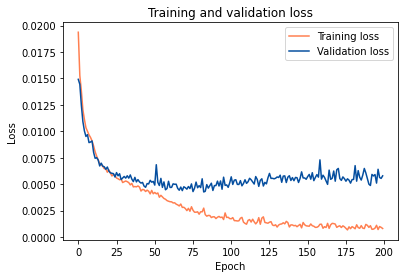

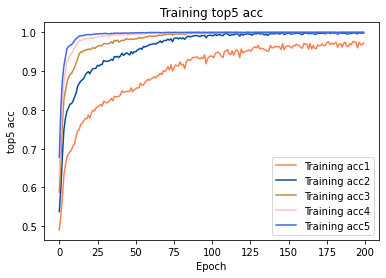

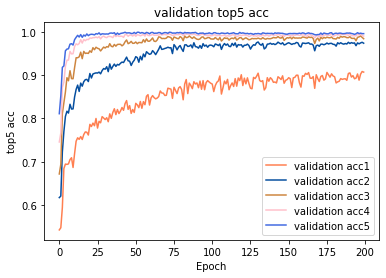

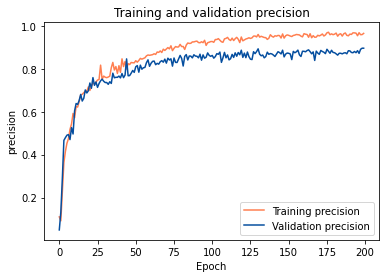

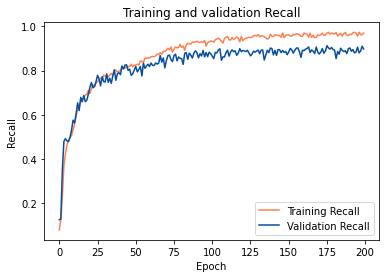

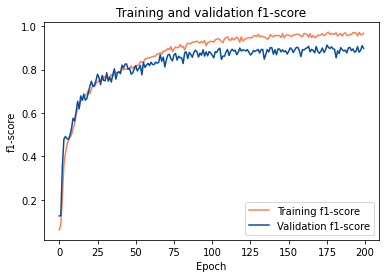

1637243769.9192388


In [30]:
# training for 3 epochs
start = time.time()
print(start)
n_epochs = 200
train(alexnet, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

### flod1(train) 

1637244073.7755709
-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0183 	 valid Loss: 0.0154
train acc1: 0.5045 	 valid acc1: 0.5264
train acc2: 0.5630 	 valid acc2: 0.5782
train acc3: 0.6211 	 valid acc3: 0.6493
train acc4: 0.6720 	 valid acc4: 0.7200
train acc5: 0.7173 	 valid acc5: 0.8004
train precision: 0.0812 	 valid precision: 0.0481
train recall: 0.0880 	 valid recall: 0.1250
train f1-score: 0.0728 	 valid f1-score: 0.0646
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0151 	 valid Loss: 0.0149
train acc1: 0.5292 	 valid acc1: 0.5243
train acc2: 0.6008 	 valid acc2: 0.6275
train acc3: 0.6715 	 valid acc3: 0.7132
train acc4: 0.7380 	 valid acc4: 0.7846
train acc5: 0.8093 	 valid acc5: 0.8507
train precision: 0.1369 	 valid precision: 0.0972
train recall: 0.1278 	 valid recall: 0.1286
train f1-score: 0.0960 	 valid f1-score: 0.0698
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0141 	 valid Loss: 0.0125
train acc1: 0.5582 	 valid acc1: 0.6243
train acc2: 0.6598 	 valid acc2: 0.7318
train acc3: 0.7476 	 valid acc3: 0.8243
train acc4: 0.8177 	 valid acc4: 0.8732
train acc5: 0.8689 	 valid acc5: 0.9068
train precision: 0.1957 	 valid precision: 0.3104
train recall: 0.1921 	 valid recall: 0.3601
train f1-score: 0.1718 	 valid f1-score: 0.3085
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0119 	 valid Loss: 0.0109
train acc1: 0.6233 	 valid acc1: 0.6414
train acc2: 0.7515 	 valid acc2: 0.7914
train acc3: 0.8412 	 valid acc3: 0.8575
train acc4: 0.8979 	 valid acc4: 0.9193
train acc5: 0.9337 	 valid acc5: 0.9539
train precision: 0.3409 	 valid precision: 0.3609
train recall: 0.3402 	 valid recall: 0.3965
train f1-score: 0.3312 	 valid f1-score: 0.3658
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0110 	 valid Loss: 0.0104
train acc1: 0.6463 	 valid acc1: 0.6807
train acc2: 0.7796 	 valid acc2: 0.8029
train acc3: 0.8651 	 valid acc3: 0.8825
train acc4: 0.9223 	 valid acc4: 0.9282
train acc5: 0.9557 	 valid acc5: 0.9621
train precision: 0.3875 	 valid precision: 0.4824
train recall: 0.3932 	 valid recall: 0.5064
train f1-score: 0.3863 	 valid f1-score: 0.4871
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0104 	 valid Loss: 0.0099
train acc1: 0.6639 	 valid acc1: 0.6596
train acc2: 0.7993 	 valid acc2: 0.8025
train acc3: 0.8848 	 valid acc3: 0.8954
train acc4: 0.9364 	 valid acc4: 0.9389
train acc5: 0.9625 	 valid acc5: 0.9675
train precision: 0.4188 	 valid precision: 0.3810
train recall: 0.4268 	 valid recall: 0.4368
train f1-score: 0.4169 	 valid f1-score: 0.4013
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0099 	 valid Loss: 0.0096
train acc1: 0.6719 	 valid acc1: 0.6646
train acc2: 0.8089 	 valid acc2: 0.8068
train acc3: 0.8893 	 valid acc3: 0.8768
train acc4: 0.9406 	 valid acc4: 0.9461
train acc5: 0.9652 	 valid acc5: 0.9693
train precision: 0.4715 	 valid precision: 0.3940
train recall: 0.4468 	 valid recall: 0.4430
train f1-score: 0.4385 	 valid f1-score: 0.4098
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0092 	 valid Loss: 0.0088
train acc1: 0.6858 	 valid acc1: 0.6996
train acc2: 0.8251 	 valid acc2: 0.8332
train acc3: 0.9029 	 valid acc3: 0.9161
train acc4: 0.9529 	 valid acc4: 0.9571
train acc5: 0.9727 	 valid acc5: 0.9746
train precision: 0.5091 	 valid precision: 0.5221
train recall: 0.4809 	 valid recall: 0.5300
train f1-score: 0.4765 	 valid f1-score: 0.5046
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0088 	 valid Loss: 0.0092
train acc1: 0.7011 	 valid acc1: 0.7007
train acc2: 0.8329 	 valid acc2: 0.8268
train acc3: 0.9065 	 valid acc3: 0.9029
train acc4: 0.9555 	 valid acc4: 0.9532
train acc5: 0.9726 	 valid acc5: 0.9750
train precision: 0.5829 	 valid precision: 0.5844
train recall: 0.5195 	 valid recall: 0.5435
train f1-score: 0.5170 	 valid f1-score: 0.5289
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0085 	 valid Loss: 0.0089
train acc1: 0.7182 	 valid acc1: 0.7039
train acc2: 0.8439 	 valid acc2: 0.8389
train acc3: 0.9182 	 valid acc3: 0.9204
train acc4: 0.9632 	 valid acc4: 0.9529
train acc5: 0.9799 	 valid acc5: 0.9732
train precision: 0.5916 	 valid precision: 0.5842
train recall: 0.5500 	 valid recall: 0.5746
train f1-score: 0.5469 	 valid f1-score: 0.5749
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0080 	 valid Loss: 0.0081
train acc1: 0.7300 	 valid acc1: 0.7079
train acc2: 0.8568 	 valid acc2: 0.8539
train acc3: 0.9267 	 valid acc3: 0.9318
train acc4: 0.9682 	 valid acc4: 0.9661
train acc5: 0.9829 	 valid acc5: 0.9836
train precision: 0.6045 	 valid precision: 0.7180
train recall: 0.5776 	 valid recall: 0.6687
train f1-score: 0.5711 	 valid f1-score: 0.6372
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0076 	 valid Loss: 0.0079
train acc1: 0.7390 	 valid acc1: 0.7336
train acc2: 0.8687 	 valid acc2: 0.8554
train acc3: 0.9362 	 valid acc3: 0.9321
train acc4: 0.9727 	 valid acc4: 0.9675
train acc5: 0.9862 	 valid acc5: 0.9857
train precision: 0.6487 	 valid precision: 0.6225
train recall: 0.6022 	 valid recall: 0.6334
train f1-score: 0.5980 	 valid f1-score: 0.6119
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0074 	 valid Loss: 0.0078
train acc1: 0.7510 	 valid acc1: 0.7175
train acc2: 0.8680 	 valid acc2: 0.8461
train acc3: 0.9375 	 valid acc3: 0.9368
train acc4: 0.9733 	 valid acc4: 0.9729
train acc5: 0.9871 	 valid acc5: 0.9893
train precision: 0.6638 	 valid precision: 0.6352
train recall: 0.6256 	 valid recall: 0.6694
train f1-score: 0.6204 	 valid f1-score: 0.6367
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0073 	 valid Loss: 0.0070
train acc1: 0.7550 	 valid acc1: 0.7582
train acc2: 0.8761 	 valid acc2: 0.8861
train acc3: 0.9432 	 valid acc3: 0.9536
train acc4: 0.9754 	 valid acc4: 0.9782
train acc5: 0.9886 	 valid acc5: 0.9904
train precision: 0.6603 	 valid precision: 0.7211
train recall: 0.6321 	 valid recall: 0.6840
train f1-score: 0.6260 	 valid f1-score: 0.6680
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0068 	 valid Loss: 0.0075
train acc1: 0.7644 	 valid acc1: 0.7479
train acc2: 0.8898 	 valid acc2: 0.8732
train acc3: 0.9504 	 valid acc3: 0.9436
train acc4: 0.9807 	 valid acc4: 0.9693
train acc5: 0.9910 	 valid acc5: 0.9861
train precision: 0.6814 	 valid precision: 0.6918
train recall: 0.6626 	 valid recall: 0.6747
train f1-score: 0.6546 	 valid f1-score: 0.6521
-------第 16 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0067 	 valid Loss: 0.0070
train acc1: 0.7705 	 valid acc1: 0.7632
train acc2: 0.8899 	 valid acc2: 0.8821
train acc3: 0.9544 	 valid acc3: 0.9539
train acc4: 0.9812 	 valid acc4: 0.9768
train acc5: 0.9911 	 valid acc5: 0.9893
train precision: 0.7038 	 valid precision: 0.7346
train recall: 0.6701 	 valid recall: 0.6799
train f1-score: 0.6632 	 valid f1-score: 0.6769
-------第 17 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0065 	 valid Loss: 0.0064
train acc1: 0.7732 	 valid acc1: 0.7782
train acc2: 0.8936 	 valid acc2: 0.8964
train acc3: 0.9583 	 valid acc3: 0.9618
train acc4: 0.9817 	 valid acc4: 0.9818
train acc5: 0.9930 	 valid acc5: 0.9918
train precision: 0.6946 	 valid precision: 0.7339
train recall: 0.6782 	 valid recall: 0.7095
train f1-score: 0.6706 	 valid f1-score: 0.7041
-------第 18 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0063 	 valid Loss: 0.0065
train acc1: 0.7801 	 valid acc1: 0.7725
train acc2: 0.8995 	 valid acc2: 0.9064
train acc3: 0.9614 	 valid acc3: 0.9621
train acc4: 0.9846 	 valid acc4: 0.9807
train acc5: 0.9942 	 valid acc5: 0.9918
train precision: 0.7051 	 valid precision: 0.7174
train recall: 0.6920 	 valid recall: 0.7124
train f1-score: 0.6888 	 valid f1-score: 0.6879
-------第 19 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0063 	 valid Loss: 0.0068
train acc1: 0.7750 	 valid acc1: 0.7650
train acc2: 0.8969 	 valid acc2: 0.8879
train acc3: 0.9570 	 valid acc3: 0.9557
train acc4: 0.9842 	 valid acc4: 0.9811
train acc5: 0.9927 	 valid acc5: 0.9896
train precision: 0.7043 	 valid precision: 0.7254
train recall: 0.6867 	 valid recall: 0.6733
train f1-score: 0.6837 	 valid f1-score: 0.6725
-------第 20 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0062 	 valid Loss: 0.0060
train acc1: 0.7888 	 valid acc1: 0.7975
train acc2: 0.9058 	 valid acc2: 0.9121
train acc3: 0.9601 	 valid acc3: 0.9643
train acc4: 0.9852 	 valid acc4: 0.9882
train acc5: 0.9943 	 valid acc5: 0.9954
train precision: 0.7508 	 valid precision: 0.7898
train recall: 0.7075 	 valid recall: 0.7269
train f1-score: 0.7046 	 valid f1-score: 0.7151
-------第 21 轮训练开始-------
train Loss: 0.0058 	 valid Loss: 0.0062
train acc1: 0.7960 	 valid acc1: 0.7846
train acc2: 0.9105 	 valid acc2: 0.9036
train acc3: 0.9649 	 valid acc3: 0.9629
train acc4: 0.9862 	 valid acc4: 0.9829
train acc5: 0.9936 	 valid acc5: 0.9925
train precision: 0.7498 	 valid precision: 0.7486
train recall: 0.7198 	 valid recall: 0.7495
train f1-score: 0.7170 	 valid f1-score: 0.7299
-------第 22 轮训练开始-------
train Loss: 0.0059 	 valid Loss: 0.0065
train acc1: 0.8000 	 valid acc1: 0.7821
train acc2: 0.9124 	 valid acc2: 0.8954
train acc3: 0.9649 	 valid acc3: 0.9564
train acc4: 0.9869 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0056 	 valid Loss: 0.0062
train acc1: 0.8085 	 valid acc1: 0.7896
train acc2: 0.9213 	 valid acc2: 0.9161
train acc3: 0.9667 	 valid acc3: 0.9632
train acc4: 0.9877 	 valid acc4: 0.9821
train acc5: 0.9962 	 valid acc5: 0.9921
train precision: 0.7648 	 valid precision: 0.7445
train recall: 0.7465 	 valid recall: 0.7263
train f1-score: 0.7413 	 valid f1-score: 0.7213
-------第 25 轮训练开始-------
train Loss: 0.0054 	 valid Loss: 0.0060
train acc1: 0.8105 	 valid acc1: 0.7929
train acc2: 0.9220 	 valid acc2: 0.9079
train acc3: 0.9702 	 valid acc3: 0.9607
train acc4: 0.9907 	 valid acc4: 0.9846
train acc5: 0.9968 	 valid acc5: 0.9936
train precision: 0.7820 	 valid precision: 0.7556
train recall: 0.7523 	 valid recall: 0.7442
train f1-score: 0.7466 	 valid f1-score: 0.7357
-------第 26 轮训练开始-------
train Loss: 0.0054 	 valid Loss: 0.0058
train acc1: 0.8119 	 valid acc1: 0.7971
train acc2: 0.9249 	 valid acc2: 0.9136
train acc3: 0.9686 	 valid acc3: 0.9661
train acc4: 0.9900 	 valid

train Loss: 0.0038 	 valid Loss: 0.0058
train acc1: 0.8632 	 valid acc1: 0.8021
train acc2: 0.9612 	 valid acc2: 0.9311
train acc3: 0.9871 	 valid acc3: 0.9750
train acc4: 0.9963 	 valid acc4: 0.9907
train acc5: 0.9988 	 valid acc5: 0.9950
train precision: 0.8464 	 valid precision: 0.7766
train recall: 0.8369 	 valid recall: 0.7866
train f1-score: 0.8349 	 valid f1-score: 0.7699
-------第 46 轮训练开始-------
train Loss: 0.0039 	 valid Loss: 0.0058
train acc1: 0.8593 	 valid acc1: 0.8154
train acc2: 0.9594 	 valid acc2: 0.9314
train acc3: 0.9886 	 valid acc3: 0.9732
train acc4: 0.9971 	 valid acc4: 0.9864
train acc5: 0.9992 	 valid acc5: 0.9929
train precision: 0.8371 	 valid precision: 0.8167
train recall: 0.8346 	 valid recall: 0.7770
train f1-score: 0.8298 	 valid f1-score: 0.7801
-------第 47 轮训练开始-------
train Loss: 0.0039 	 valid Loss: 0.0053
train acc1: 0.8574 	 valid acc1: 0.8196
train acc2: 0.9562 	 valid acc2: 0.9368
train acc3: 0.9860 	 valid acc3: 0.9718
train acc4: 0.9963 	 valid

train Loss: 0.0029 	 valid Loss: 0.0053
train acc1: 0.8946 	 valid acc1: 0.8471
train acc2: 0.9775 	 valid acc2: 0.9550
train acc3: 0.9931 	 valid acc3: 0.9793
train acc4: 0.9985 	 valid acc4: 0.9907
train acc5: 0.9995 	 valid acc5: 0.9950
train precision: 0.8802 	 valid precision: 0.8434
train recall: 0.8814 	 valid recall: 0.8131
train f1-score: 0.8782 	 valid f1-score: 0.8207
-------第 67 轮训练开始-------
train Loss: 0.0028 	 valid Loss: 0.0045
train acc1: 0.9054 	 valid acc1: 0.8564
train acc2: 0.9796 	 valid acc2: 0.9589
train acc3: 0.9936 	 valid acc3: 0.9814
train acc4: 0.9983 	 valid acc4: 0.9932
train acc5: 0.9996 	 valid acc5: 0.9957
train precision: 0.8943 	 valid precision: 0.8435
train recall: 0.8908 	 valid recall: 0.8457
train f1-score: 0.8904 	 valid f1-score: 0.8399
-------第 68 轮训练开始-------
train Loss: 0.0024 	 valid Loss: 0.0047
train acc1: 0.9129 	 valid acc1: 0.8604
train acc2: 0.9830 	 valid acc2: 0.9600
train acc3: 0.9961 	 valid acc3: 0.9811
train acc4: 0.9995 	 valid

train Loss: 0.0018 	 valid Loss: 0.0054
train acc1: 0.9408 	 valid acc1: 0.8614
train acc2: 0.9924 	 valid acc2: 0.9614
train acc3: 0.9979 	 valid acc3: 0.9832
train acc4: 0.9995 	 valid acc4: 0.9904
train acc5: 0.9999 	 valid acc5: 0.9932
train precision: 0.9286 	 valid precision: 0.8437
train recall: 0.9348 	 valid recall: 0.8604
train f1-score: 0.9311 	 valid f1-score: 0.8474
-------第 88 轮训练开始-------
train Loss: 0.0020 	 valid Loss: 0.0050
train acc1: 0.9310 	 valid acc1: 0.8696
train acc2: 0.9892 	 valid acc2: 0.9607
train acc3: 0.9977 	 valid acc3: 0.9807
train acc4: 0.9992 	 valid acc4: 0.9918
train acc5: 0.9996 	 valid acc5: 0.9964
train precision: 0.9176 	 valid precision: 0.8471
train recall: 0.9174 	 valid recall: 0.8706
train f1-score: 0.9167 	 valid f1-score: 0.8552
-------第 89 轮训练开始-------
train Loss: 0.0018 	 valid Loss: 0.0049
train acc1: 0.9313 	 valid acc1: 0.8782
train acc2: 0.9921 	 valid acc2: 0.9654
train acc3: 0.9981 	 valid acc3: 0.9839
train acc4: 0.9996 	 valid

train Loss: 0.0015 	 valid Loss: 0.0057
train acc1: 0.9524 	 valid acc1: 0.8657
train acc2: 0.9921 	 valid acc2: 0.9643
train acc3: 0.9979 	 valid acc3: 0.9825
train acc4: 0.9992 	 valid acc4: 0.9900
train acc5: 0.9999 	 valid acc5: 0.9925
train precision: 0.9402 	 valid precision: 0.8513
train recall: 0.9437 	 valid recall: 0.8655
train f1-score: 0.9415 	 valid f1-score: 0.8548
-------第 109 轮训练开始-------
train Loss: 0.0016 	 valid Loss: 0.0056
train acc1: 0.9436 	 valid acc1: 0.8711
train acc2: 0.9931 	 valid acc2: 0.9621
train acc3: 0.9974 	 valid acc3: 0.9836
train acc4: 0.9993 	 valid acc4: 0.9904
train acc5: 0.9996 	 valid acc5: 0.9943
train precision: 0.9312 	 valid precision: 0.8573
train recall: 0.9370 	 valid recall: 0.8711
train f1-score: 0.9337 	 valid f1-score: 0.8618
-------第 110 轮训练开始-------
train Loss: 0.0014 	 valid Loss: 0.0057
train acc1: 0.9520 	 valid acc1: 0.8779
train acc2: 0.9955 	 valid acc2: 0.9664
train acc3: 0.9993 	 valid acc3: 0.9796
train acc4: 0.9995 	 val

train Loss: 0.0009 	 valid Loss: 0.0058
train acc1: 0.9671 	 valid acc1: 0.8854
train acc2: 0.9981 	 valid acc2: 0.9696
train acc3: 0.9998 	 valid acc3: 0.9829
train acc4: 1.0000 	 valid acc4: 0.9893
train acc5: 1.0000 	 valid acc5: 0.9954
train precision: 0.9570 	 valid precision: 0.8755
train recall: 0.9626 	 valid recall: 0.8595
train f1-score: 0.9594 	 valid f1-score: 0.8655
-------第 130 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0058
train acc1: 0.9606 	 valid acc1: 0.8743
train acc2: 0.9958 	 valid acc2: 0.9654
train acc3: 0.9989 	 valid acc3: 0.9839
train acc4: 0.9998 	 valid acc4: 0.9911
train acc5: 1.0000 	 valid acc5: 0.9932
train precision: 0.9496 	 valid precision: 0.8610
train recall: 0.9537 	 valid recall: 0.8606
train f1-score: 0.9514 	 valid f1-score: 0.8573
-------第 131 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0052
train acc1: 0.9590 	 valid acc1: 0.8868
train acc2: 0.9957 	 valid acc2: 0.9696
train acc3: 0.9993 	 valid acc3: 0.9829
train acc4: 1.0000 	 val

train Loss: 0.0011 	 valid Loss: 0.0058
train acc1: 0.9600 	 valid acc1: 0.8918
train acc2: 0.9965 	 valid acc2: 0.9611
train acc3: 0.9993 	 valid acc3: 0.9786
train acc4: 0.9998 	 valid acc4: 0.9896
train acc5: 0.9999 	 valid acc5: 0.9957
train precision: 0.9484 	 valid precision: 0.8796
train recall: 0.9552 	 valid recall: 0.8930
train f1-score: 0.9517 	 valid f1-score: 0.8845
-------第 151 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0060
train acc1: 0.9674 	 valid acc1: 0.8886
train acc2: 0.9985 	 valid acc2: 0.9657
train acc3: 0.9995 	 valid acc3: 0.9800
train acc4: 1.0000 	 valid acc4: 0.9893
train acc5: 1.0000 	 valid acc5: 0.9936
train precision: 0.9598 	 valid precision: 0.8681
train recall: 0.9628 	 valid recall: 0.8940
train f1-score: 0.9612 	 valid f1-score: 0.8783
-------第 152 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0056
train acc1: 0.9715 	 valid acc1: 0.8907
train acc2: 0.9979 	 valid acc2: 0.9682
train acc3: 0.9995 	 valid acc3: 0.9836
train acc4: 0.9999 	 val

train Loss: 0.0010 	 valid Loss: 0.0057
train acc1: 0.9677 	 valid acc1: 0.8829
train acc2: 0.9968 	 valid acc2: 0.9686
train acc3: 0.9989 	 valid acc3: 0.9829
train acc4: 0.9998 	 valid acc4: 0.9911
train acc5: 0.9998 	 valid acc5: 0.9954
train precision: 0.9590 	 valid precision: 0.8754
train recall: 0.9601 	 valid recall: 0.8736
train f1-score: 0.9593 	 valid f1-score: 0.8725
-------第 172 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0058
train acc1: 0.9710 	 valid acc1: 0.8939
train acc2: 0.9974 	 valid acc2: 0.9696
train acc3: 0.9989 	 valid acc3: 0.9832
train acc4: 0.9999 	 valid acc4: 0.9889
train acc5: 0.9999 	 valid acc5: 0.9946
train precision: 0.9628 	 valid precision: 0.8810
train recall: 0.9666 	 valid recall: 0.8826
train f1-score: 0.9644 	 valid f1-score: 0.8799
-------第 173 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0061
train acc1: 0.9706 	 valid acc1: 0.8789
train acc2: 0.9979 	 valid acc2: 0.9636
train acc3: 0.9993 	 valid acc3: 0.9829
train acc4: 0.9994 	 val

train Loss: 0.0010 	 valid Loss: 0.0053
train acc1: 0.9693 	 valid acc1: 0.8900
train acc2: 0.9968 	 valid acc2: 0.9682
train acc3: 0.9992 	 valid acc3: 0.9818
train acc4: 0.9996 	 valid acc4: 0.9882
train acc5: 0.9999 	 valid acc5: 0.9946
train precision: 0.9591 	 valid precision: 0.8830
train recall: 0.9619 	 valid recall: 0.8774
train f1-score: 0.9603 	 valid f1-score: 0.8787
-------第 193 轮训练开始-------
train Loss: 0.0007 	 valid Loss: 0.0055
train acc1: 0.9758 	 valid acc1: 0.8904
train acc2: 0.9975 	 valid acc2: 0.9671
train acc3: 0.9996 	 valid acc3: 0.9846
train acc4: 1.0000 	 valid acc4: 0.9932
train acc5: 1.0000 	 valid acc5: 0.9975
train precision: 0.9684 	 valid precision: 0.8720
train recall: 0.9691 	 valid recall: 0.9008
train f1-score: 0.9686 	 valid f1-score: 0.8849
-------第 194 轮训练开始-------
train Loss: 0.0006 	 valid Loss: 0.0067
train acc1: 0.9792 	 valid acc1: 0.8914
train acc2: 0.9988 	 valid acc2: 0.9711
train acc3: 0.9998 	 valid acc3: 0.9829
train acc4: 1.0000 	 val

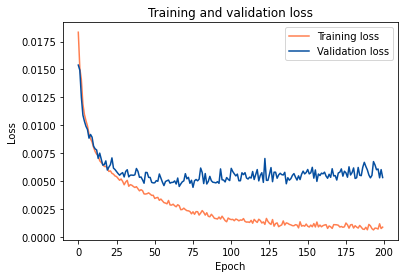

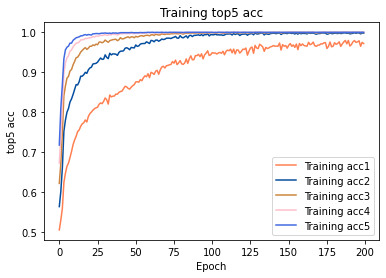

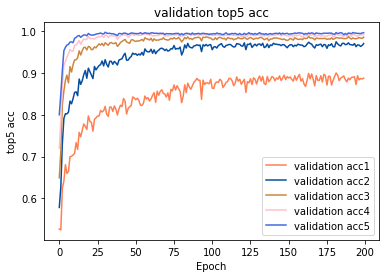

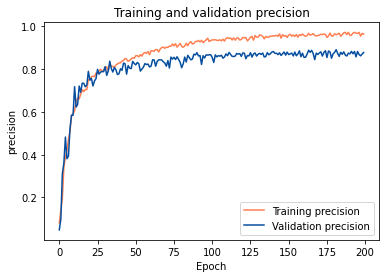

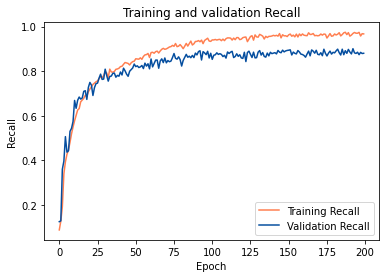

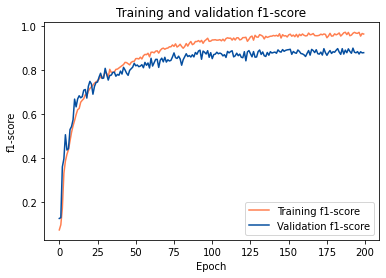

1637245012.120754


In [53]:
# training for 3 epochs
start = time.time()
print(start)
n_epochs = 200
train(alexnet, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

###  flod2(train)

1637245220.140147
-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0185 	 valid Loss: 0.0150
train acc1: 0.4985 	 valid acc1: 0.5339
train acc2: 0.5567 	 valid acc2: 0.6114
train acc3: 0.6101 	 valid acc3: 0.6807
train acc4: 0.6662 	 valid acc4: 0.7686
train acc5: 0.7179 	 valid acc5: 0.8086
train precision: 0.0745 	 valid precision: 0.0644
train recall: 0.0869 	 valid recall: 0.1267
train f1-score: 0.0738 	 valid f1-score: 0.0684
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0149 	 valid Loss: 0.0138
train acc1: 0.5393 	 valid acc1: 0.5700
train acc2: 0.6148 	 valid acc2: 0.6825
train acc3: 0.6935 	 valid acc3: 0.7589
train acc4: 0.7592 	 valid acc4: 0.8104
train acc5: 0.8221 	 valid acc5: 0.8839
train precision: 0.1412 	 valid precision: 0.2212
train recall: 0.1452 	 valid recall: 0.2120
train f1-score: 0.1093 	 valid f1-score: 0.1542
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0129 	 valid Loss: 0.0113
train acc1: 0.6079 	 valid acc1: 0.6450
train acc2: 0.7185 	 valid acc2: 0.7536
train acc3: 0.8037 	 valid acc3: 0.8375
train acc4: 0.8587 	 valid acc4: 0.8925
train acc5: 0.9005 	 valid acc5: 0.9282
train precision: 0.3177 	 valid precision: 0.3994
train recall: 0.3010 	 valid recall: 0.3955
train f1-score: 0.2970 	 valid f1-score: 0.3692
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0116 	 valid Loss: 0.0114
train acc1: 0.6320 	 valid acc1: 0.6104
train acc2: 0.7555 	 valid acc2: 0.7668
train acc3: 0.8415 	 valid acc3: 0.8479
train acc4: 0.8955 	 valid acc4: 0.9096
train acc5: 0.9331 	 valid acc5: 0.9500
train precision: 0.3657 	 valid precision: 0.3009
train recall: 0.3688 	 valid recall: 0.3818
train f1-score: 0.3640 	 valid f1-score: 0.3251
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0109 	 valid Loss: 0.0110
train acc1: 0.6477 	 valid acc1: 0.6518
train acc2: 0.7783 	 valid acc2: 0.7743
train acc3: 0.8636 	 valid acc3: 0.8782
train acc4: 0.9171 	 valid acc4: 0.9261
train acc5: 0.9533 	 valid acc5: 0.9546
train precision: 0.3935 	 valid precision: 0.3629
train recall: 0.3994 	 valid recall: 0.4010
train f1-score: 0.3931 	 valid f1-score: 0.3736
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0104 	 valid Loss: 0.0102
train acc1: 0.6636 	 valid acc1: 0.6786
train acc2: 0.7965 	 valid acc2: 0.7925
train acc3: 0.8827 	 valid acc3: 0.8782
train acc4: 0.9302 	 valid acc4: 0.9286
train acc5: 0.9612 	 valid acc5: 0.9564
train precision: 0.4534 	 valid precision: 0.5000
train recall: 0.4333 	 valid recall: 0.5005
train f1-score: 0.4286 	 valid f1-score: 0.4855
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0098 	 valid Loss: 0.0094
train acc1: 0.6804 	 valid acc1: 0.6921
train acc2: 0.8101 	 valid acc2: 0.8150
train acc3: 0.8901 	 valid acc3: 0.9025
train acc4: 0.9421 	 valid acc4: 0.9489
train acc5: 0.9656 	 valid acc5: 0.9711
train precision: 0.5538 	 valid precision: 0.5218
train recall: 0.4714 	 valid recall: 0.5212
train f1-score: 0.4660 	 valid f1-score: 0.5001
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0091 	 valid Loss: 0.0087
train acc1: 0.6960 	 valid acc1: 0.7107
train acc2: 0.8204 	 valid acc2: 0.8279
train acc3: 0.8969 	 valid acc3: 0.9079
train acc4: 0.9483 	 valid acc4: 0.9582
train acc5: 0.9685 	 valid acc5: 0.9796
train precision: 0.5453 	 valid precision: 0.5566
train recall: 0.5049 	 valid recall: 0.5601
train f1-score: 0.5056 	 valid f1-score: 0.5497
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0087 	 valid Loss: 0.0083
train acc1: 0.7058 	 valid acc1: 0.7246
train acc2: 0.8352 	 valid acc2: 0.8357
train acc3: 0.9093 	 valid acc3: 0.9068
train acc4: 0.9550 	 valid acc4: 0.9514
train acc5: 0.9733 	 valid acc5: 0.9757
train precision: 0.5604 	 valid precision: 0.6206
train recall: 0.5372 	 valid recall: 0.5895
train f1-score: 0.5365 	 valid f1-score: 0.5772
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0083 	 valid Loss: 0.0082
train acc1: 0.7124 	 valid acc1: 0.7293
train acc2: 0.8471 	 valid acc2: 0.8457
train acc3: 0.9187 	 valid acc3: 0.9107
train acc4: 0.9614 	 valid acc4: 0.9550
train acc5: 0.9793 	 valid acc5: 0.9736
train precision: 0.5857 	 valid precision: 0.6220
train recall: 0.5537 	 valid recall: 0.5720
train f1-score: 0.5552 	 valid f1-score: 0.5711
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0078 	 valid Loss: 0.0075
train acc1: 0.7355 	 valid acc1: 0.7425
train acc2: 0.8550 	 valid acc2: 0.8643
train acc3: 0.9271 	 valid acc3: 0.9346
train acc4: 0.9667 	 valid acc4: 0.9736
train acc5: 0.9843 	 valid acc5: 0.9879
train precision: 0.6245 	 valid precision: 0.6102
train recall: 0.5990 	 valid recall: 0.6267
train f1-score: 0.5979 	 valid f1-score: 0.6106
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0077 	 valid Loss: 0.0073
train acc1: 0.7438 	 valid acc1: 0.7518
train acc2: 0.8648 	 valid acc2: 0.8800
train acc3: 0.9343 	 valid acc3: 0.9432
train acc4: 0.9706 	 valid acc4: 0.9743
train acc5: 0.9865 	 valid acc5: 0.9893
train precision: 0.6300 	 valid precision: 0.6525
train recall: 0.6092 	 valid recall: 0.6261
train f1-score: 0.6052 	 valid f1-score: 0.6086
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0073 	 valid Loss: 0.0072
train acc1: 0.7518 	 valid acc1: 0.7579
train acc2: 0.8720 	 valid acc2: 0.8814
train acc3: 0.9381 	 valid acc3: 0.9432
train acc4: 0.9724 	 valid acc4: 0.9761
train acc5: 0.9877 	 valid acc5: 0.9907
train precision: 0.6600 	 valid precision: 0.6716
train recall: 0.6396 	 valid recall: 0.6610
train f1-score: 0.6324 	 valid f1-score: 0.6555
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0070 	 valid Loss: 0.0072
train acc1: 0.7662 	 valid acc1: 0.7539
train acc2: 0.8824 	 valid acc2: 0.8761
train acc3: 0.9511 	 valid acc3: 0.9443
train acc4: 0.9793 	 valid acc4: 0.9754
train acc5: 0.9921 	 valid acc5: 0.9914
train precision: 0.6815 	 valid precision: 0.6887
train recall: 0.6643 	 valid recall: 0.6463
train f1-score: 0.6569 	 valid f1-score: 0.6504
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0068 	 valid Loss: 0.0066
train acc1: 0.7669 	 valid acc1: 0.7750
train acc2: 0.8819 	 valid acc2: 0.8943
train acc3: 0.9468 	 valid acc3: 0.9514
train acc4: 0.9775 	 valid acc4: 0.9821
train acc5: 0.9911 	 valid acc5: 0.9936
train precision: 0.6873 	 valid precision: 0.7094
train recall: 0.6676 	 valid recall: 0.6801
train f1-score: 0.6597 	 valid f1-score: 0.6699
-------第 16 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0065 	 valid Loss: 0.0068
train acc1: 0.7712 	 valid acc1: 0.7657
train acc2: 0.8898 	 valid acc2: 0.8886
train acc3: 0.9556 	 valid acc3: 0.9493
train acc4: 0.9824 	 valid acc4: 0.9825
train acc5: 0.9931 	 valid acc5: 0.9932
train precision: 0.6847 	 valid precision: 0.7049
train recall: 0.6797 	 valid recall: 0.6878
train f1-score: 0.6727 	 valid f1-score: 0.6683
-------第 17 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0063 	 valid Loss: 0.0071
train acc1: 0.7840 	 valid acc1: 0.7661
train acc2: 0.9037 	 valid acc2: 0.8825
train acc3: 0.9607 	 valid acc3: 0.9550
train acc4: 0.9830 	 valid acc4: 0.9846
train acc5: 0.9938 	 valid acc5: 0.9946
train precision: 0.7103 	 valid precision: 0.7711
train recall: 0.7092 	 valid recall: 0.6505
train f1-score: 0.7005 	 valid f1-score: 0.6363
-------第 18 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0062 	 valid Loss: 0.0063
train acc1: 0.7868 	 valid acc1: 0.7893
train acc2: 0.9014 	 valid acc2: 0.9011
train acc3: 0.9593 	 valid acc3: 0.9586
train acc4: 0.9855 	 valid acc4: 0.9871
train acc5: 0.9938 	 valid acc5: 0.9946
train precision: 0.7192 	 valid precision: 0.7634
train recall: 0.7083 	 valid recall: 0.7395
train f1-score: 0.7021 	 valid f1-score: 0.7197
-------第 19 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0060 	 valid Loss: 0.0069
train acc1: 0.7983 	 valid acc1: 0.7679
train acc2: 0.9076 	 valid acc2: 0.8889
train acc3: 0.9592 	 valid acc3: 0.9450
train acc4: 0.9857 	 valid acc4: 0.9789
train acc5: 0.9942 	 valid acc5: 0.9914
train precision: 0.7284 	 valid precision: 0.7501
train recall: 0.7282 	 valid recall: 0.7082
train f1-score: 0.7184 	 valid f1-score: 0.6961
-------第 20 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0061 	 valid Loss: 0.0067
train acc1: 0.7918 	 valid acc1: 0.7543
train acc2: 0.9043 	 valid acc2: 0.8800
train acc3: 0.9610 	 valid acc3: 0.9561
train acc4: 0.9843 	 valid acc4: 0.9789
train acc5: 0.9937 	 valid acc5: 0.9900
train precision: 0.7282 	 valid precision: 0.7051
train recall: 0.7215 	 valid recall: 0.7588
train f1-score: 0.7138 	 valid f1-score: 0.7100
-------第 21 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0059 	 valid Loss: 0.0060
train acc1: 0.7970 	 valid acc1: 0.7936
train acc2: 0.9086 	 valid acc2: 0.9064
train acc3: 0.9635 	 valid acc3: 0.9554
train acc4: 0.9865 	 valid acc4: 0.9836
train acc5: 0.9949 	 valid acc5: 0.9929
train precision: 0.7365 	 valid precision: 0.7587
train recall: 0.7314 	 valid recall: 0.7463
train f1-score: 0.7271 	 valid f1-score: 0.7314
-------第 22 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0058 	 valid Loss: 0.0061
train acc1: 0.8067 	 valid acc1: 0.7964
train acc2: 0.9125 	 valid acc2: 0.9007
train acc3: 0.9637 	 valid acc3: 0.9571
train acc4: 0.9865 	 valid acc4: 0.9864
train acc5: 0.9952 	 valid acc5: 0.9954
train precision: 0.7502 	 valid precision: 0.7693
train recall: 0.7452 	 valid recall: 0.7222
train f1-score: 0.7385 	 valid f1-score: 0.7255
-------第 23 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0056 	 valid Loss: 0.0058
train acc1: 0.8080 	 valid acc1: 0.8061
train acc2: 0.9174 	 valid acc2: 0.9121
train acc3: 0.9667 	 valid acc3: 0.9625
train acc4: 0.9889 	 valid acc4: 0.9875
train acc5: 0.9963 	 valid acc5: 0.9950
train precision: 0.7426 	 valid precision: 0.7683
train recall: 0.7485 	 valid recall: 0.7516
train f1-score: 0.7382 	 valid f1-score: 0.7504
-------第 24 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0055 	 valid Loss: 0.0063
train acc1: 0.8102 	 valid acc1: 0.7889
train acc2: 0.9171 	 valid acc2: 0.8993
train acc3: 0.9681 	 valid acc3: 0.9579
train acc4: 0.9875 	 valid acc4: 0.9861
train acc5: 0.9957 	 valid acc5: 0.9943
train precision: 0.7476 	 valid precision: 0.7425
train recall: 0.7598 	 valid recall: 0.7360
train f1-score: 0.7472 	 valid f1-score: 0.7230
-------第 25 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0055 	 valid Loss: 0.0060
train acc1: 0.8100 	 valid acc1: 0.8018
train acc2: 0.9173 	 valid acc2: 0.9079
train acc3: 0.9690 	 valid acc3: 0.9621
train acc4: 0.9888 	 valid acc4: 0.9811
train acc5: 0.9960 	 valid acc5: 0.9925
train precision: 0.7499 	 valid precision: 0.7558
train recall: 0.7548 	 valid recall: 0.7499
train f1-score: 0.7443 	 valid f1-score: 0.7439
-------第 26 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0055 	 valid Loss: 0.0057
train acc1: 0.8125 	 valid acc1: 0.7968
train acc2: 0.9180 	 valid acc2: 0.9193
train acc3: 0.9694 	 valid acc3: 0.9679
train acc4: 0.9902 	 valid acc4: 0.9879
train acc5: 0.9960 	 valid acc5: 0.9954
train precision: 0.7547 	 valid precision: 0.7459
train recall: 0.7577 	 valid recall: 0.7738
train f1-score: 0.7457 	 valid f1-score: 0.7501
-------第 27 轮训练开始-------
train Loss: 0.0050 	 valid Loss: 0.0058
train acc1: 0.8286 	 valid acc1: 0.7939
train acc2: 0.9273 	 valid acc2: 0.9089
train acc3: 0.9742 	 valid acc3: 0.9654
train acc4: 0.9914 	 valid acc4: 0.9882
train acc5: 0.9976 	 valid acc5: 0.9954
train precision: 0.7719 	 valid precision: 0.7611
train recall: 0.7857 	 valid recall: 0.7418
train f1-score: 0.7730 	 valid f1-score: 0.7236
-------第 28 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0051 	 valid Loss: 0.0056
train acc1: 0.8256 	 valid acc1: 0.8136
train acc2: 0.9233 	 valid acc2: 0.9164
train acc3: 0.9706 	 valid acc3: 0.9711
train acc4: 0.9906 	 valid acc4: 0.9882
train acc5: 0.9974 	 valid acc5: 0.9961
train precision: 0.7807 	 valid precision: 0.7883
train recall: 0.7811 	 valid recall: 0.7632
train f1-score: 0.7686 	 valid f1-score: 0.7585
-------第 29 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0051 	 valid Loss: 0.0056
train acc1: 0.8264 	 valid acc1: 0.8100
train acc2: 0.9243 	 valid acc2: 0.9132
train acc3: 0.9719 	 valid acc3: 0.9732
train acc4: 0.9919 	 valid acc4: 0.9896
train acc5: 0.9968 	 valid acc5: 0.9929
train precision: 0.7967 	 valid precision: 0.7493
train recall: 0.7834 	 valid recall: 0.7686
train f1-score: 0.7695 	 valid f1-score: 0.7472
-------第 30 轮训练开始-------
train Loss: 0.0049 	 valid Loss: 0.0056
train acc1: 0.8308 	 valid acc1: 0.8111
train acc2: 0.9274 	 valid acc2: 0.9161
train acc3: 0.9729 	 valid acc3: 0.9632
train acc4: 0.9910 	 valid acc4: 0.9864
train acc5: 0.9974 	 valid acc5: 0.9929
train precision: 0.7911 	 valid precision: 0.7833
train recall: 0.7894 	 valid recall: 0.7870
train f1-score: 0.7761 	 valid f1-score: 0.7710
-------第 31 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0049 	 valid Loss: 0.0059
train acc1: 0.8300 	 valid acc1: 0.8007
train acc2: 0.9286 	 valid acc2: 0.9200
train acc3: 0.9714 	 valid acc3: 0.9639
train acc4: 0.9905 	 valid acc4: 0.9879
train acc5: 0.9970 	 valid acc5: 0.9929
train precision: 0.7899 	 valid precision: 0.7444
train recall: 0.7878 	 valid recall: 0.7774
train f1-score: 0.7754 	 valid f1-score: 0.7549
-------第 32 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0050 	 valid Loss: 0.0055
train acc1: 0.8275 	 valid acc1: 0.8161
train acc2: 0.9268 	 valid acc2: 0.9243
train acc3: 0.9727 	 valid acc3: 0.9700
train acc4: 0.9921 	 valid acc4: 0.9889
train acc5: 0.9973 	 valid acc5: 0.9929
train precision: 0.7897 	 valid precision: 0.7608
train recall: 0.7859 	 valid recall: 0.7752
train f1-score: 0.7727 	 valid f1-score: 0.7610
-------第 33 轮训练开始-------
train Loss: 0.0047 	 valid Loss: 0.0058
train acc1: 0.8386 	 valid acc1: 0.8132
train acc2: 0.9363 	 valid acc2: 0.9175
train acc3: 0.9768 	 valid acc3: 0.9654
train acc4: 0.9937 	 valid acc4: 0.9864
train acc5: 0.9981 	 valid acc5: 0.9975
train precision: 0.8006 	 valid precision: 0.7928
train recall: 0.8005 	 valid recall: 0.7589
train f1-score: 0.7871 	 valid f1-score: 0.7571
-------第 34 轮训练开始-------
train Loss: 0.0048 	 valid Loss: 0.0054
train acc1: 0.8370 	 valid acc1: 0.8279
train acc2: 0.9300 	 valid acc2: 0.9225
train acc3: 0.9768 	 valid acc3: 0.9654
train acc4: 0.9925 	 valid

train Loss: 0.0036 	 valid Loss: 0.0050
train acc1: 0.8712 	 valid acc1: 0.8443
train acc2: 0.9589 	 valid acc2: 0.9450
train acc3: 0.9865 	 valid acc3: 0.9764
train acc4: 0.9962 	 valid acc4: 0.9907
train acc5: 0.9990 	 valid acc5: 0.9936
train precision: 0.8480 	 valid precision: 0.8236
train recall: 0.8451 	 valid recall: 0.8051
train f1-score: 0.8403 	 valid f1-score: 0.8068
-------第 54 轮训练开始-------
train Loss: 0.0034 	 valid Loss: 0.0054
train acc1: 0.8804 	 valid acc1: 0.8439
train acc2: 0.9621 	 valid acc2: 0.9379
train acc3: 0.9862 	 valid acc3: 0.9761
train acc4: 0.9970 	 valid acc4: 0.9904
train acc5: 0.9995 	 valid acc5: 0.9954
train precision: 0.8613 	 valid precision: 0.8247
train recall: 0.8550 	 valid recall: 0.8165
train f1-score: 0.8519 	 valid f1-score: 0.8071
-------第 55 轮训练开始-------
train Loss: 0.0035 	 valid Loss: 0.0052
train acc1: 0.8767 	 valid acc1: 0.8364
train acc2: 0.9610 	 valid acc2: 0.9421
train acc3: 0.9882 	 valid acc3: 0.9754
train acc4: 0.9979 	 valid

train Loss: 0.0023 	 valid Loss: 0.0045
train acc1: 0.9176 	 valid acc1: 0.8750
train acc2: 0.9825 	 valid acc2: 0.9607
train acc3: 0.9946 	 valid acc3: 0.9839
train acc4: 0.9990 	 valid acc4: 0.9954
train acc5: 0.9996 	 valid acc5: 0.9975
train precision: 0.9010 	 valid precision: 0.8533
train recall: 0.9071 	 valid recall: 0.8654
train f1-score: 0.9029 	 valid f1-score: 0.8565
-------第 75 轮训练开始-------
train Loss: 0.0024 	 valid Loss: 0.0049
train acc1: 0.9190 	 valid acc1: 0.8764
train acc2: 0.9844 	 valid acc2: 0.9614
train acc3: 0.9946 	 valid acc3: 0.9843
train acc4: 0.9983 	 valid acc4: 0.9929
train acc5: 0.9994 	 valid acc5: 0.9964
train precision: 0.9033 	 valid precision: 0.8642
train recall: 0.9089 	 valid recall: 0.8483
train f1-score: 0.9048 	 valid f1-score: 0.8535
-------第 76 轮训练开始-------
train Loss: 0.0027 	 valid Loss: 0.0053
train acc1: 0.9012 	 valid acc1: 0.8425
train acc2: 0.9762 	 valid acc2: 0.9568
train acc3: 0.9908 	 valid acc3: 0.9786
train acc4: 0.9963 	 valid

train Loss: 0.0017 	 valid Loss: 0.0050
train acc1: 0.9449 	 valid acc1: 0.8725
train acc2: 0.9912 	 valid acc2: 0.9536
train acc3: 0.9973 	 valid acc3: 0.9854
train acc4: 0.9996 	 valid acc4: 0.9936
train acc5: 0.9999 	 valid acc5: 0.9975
train precision: 0.9337 	 valid precision: 0.8517
train recall: 0.9408 	 valid recall: 0.8569
train f1-score: 0.9370 	 valid f1-score: 0.8515
-------第 96 轮训练开始-------
train Loss: 0.0018 	 valid Loss: 0.0054
train acc1: 0.9363 	 valid acc1: 0.8729
train acc2: 0.9899 	 valid acc2: 0.9668
train acc3: 0.9970 	 valid acc3: 0.9857
train acc4: 0.9994 	 valid acc4: 0.9936
train acc5: 0.9999 	 valid acc5: 0.9971
train precision: 0.9212 	 valid precision: 0.8512
train recall: 0.9293 	 valid recall: 0.8526
train f1-score: 0.9249 	 valid f1-score: 0.8491
-------第 97 轮训练开始-------
train Loss: 0.0018 	 valid Loss: 0.0046
train acc1: 0.9352 	 valid acc1: 0.8918
train acc2: 0.9919 	 valid acc2: 0.9646
train acc3: 0.9974 	 valid acc3: 0.9857
train acc4: 0.9992 	 valid

train Loss: 0.0014 	 valid Loss: 0.0050
train acc1: 0.9527 	 valid acc1: 0.8925
train acc2: 0.9940 	 valid acc2: 0.9679
train acc3: 0.9986 	 valid acc3: 0.9868
train acc4: 0.9996 	 valid acc4: 0.9946
train acc5: 0.9999 	 valid acc5: 0.9961
train precision: 0.9406 	 valid precision: 0.8809
train recall: 0.9491 	 valid recall: 0.8767
train f1-score: 0.9445 	 valid f1-score: 0.8770
-------第 117 轮训练开始-------
train Loss: 0.0014 	 valid Loss: 0.0049
train acc1: 0.9525 	 valid acc1: 0.8975
train acc2: 0.9944 	 valid acc2: 0.9686
train acc3: 0.9983 	 valid acc3: 0.9868
train acc4: 0.9996 	 valid acc4: 0.9929
train acc5: 1.0000 	 valid acc5: 0.9975
train precision: 0.9422 	 valid precision: 0.8869
train recall: 0.9495 	 valid recall: 0.8945
train f1-score: 0.9457 	 valid f1-score: 0.8891
-------第 118 轮训练开始-------
train Loss: 0.0014 	 valid Loss: 0.0055
train acc1: 0.9543 	 valid acc1: 0.8725
train acc2: 0.9942 	 valid acc2: 0.9650
train acc3: 0.9983 	 valid acc3: 0.9829
train acc4: 0.9998 	 val

train Loss: 0.0012 	 valid Loss: 0.0053
train acc1: 0.9575 	 valid acc1: 0.8900
train acc2: 0.9956 	 valid acc2: 0.9661
train acc3: 0.9985 	 valid acc3: 0.9854
train acc4: 0.9994 	 valid acc4: 0.9918
train acc5: 0.9999 	 valid acc5: 0.9964
train precision: 0.9454 	 valid precision: 0.8772
train recall: 0.9483 	 valid recall: 0.8815
train f1-score: 0.9467 	 valid f1-score: 0.8783
-------第 138 轮训练开始-------
train Loss: 0.0011 	 valid Loss: 0.0055
train acc1: 0.9615 	 valid acc1: 0.9029
train acc2: 0.9954 	 valid acc2: 0.9679
train acc3: 0.9988 	 valid acc3: 0.9846
train acc4: 0.9995 	 valid acc4: 0.9921
train acc5: 0.9999 	 valid acc5: 0.9946
train precision: 0.9483 	 valid precision: 0.8925
train recall: 0.9574 	 valid recall: 0.8898
train f1-score: 0.9525 	 valid f1-score: 0.8884
-------第 139 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0053
train acc1: 0.9592 	 valid acc1: 0.8957
train acc2: 0.9945 	 valid acc2: 0.9704
train acc3: 0.9989 	 valid acc3: 0.9889
train acc4: 0.9998 	 val

train Loss: 0.0007 	 valid Loss: 0.0057
train acc1: 0.9761 	 valid acc1: 0.9025
train acc2: 0.9986 	 valid acc2: 0.9725
train acc3: 0.9998 	 valid acc3: 0.9889
train acc4: 1.0000 	 valid acc4: 0.9954
train acc5: 1.0000 	 valid acc5: 0.9957
train precision: 0.9692 	 valid precision: 0.8894
train recall: 0.9734 	 valid recall: 0.8992
train f1-score: 0.9712 	 valid f1-score: 0.8937
-------第 159 轮训练开始-------
train Loss: 0.0010 	 valid Loss: 0.0058
train acc1: 0.9669 	 valid acc1: 0.8871
train acc2: 0.9974 	 valid acc2: 0.9661
train acc3: 0.9998 	 valid acc3: 0.9857
train acc4: 1.0000 	 valid acc4: 0.9943
train acc5: 1.0000 	 valid acc5: 0.9957
train precision: 0.9563 	 valid precision: 0.8750
train recall: 0.9612 	 valid recall: 0.8626
train f1-score: 0.9585 	 valid f1-score: 0.8657
-------第 160 轮训练开始-------
train Loss: 0.0015 	 valid Loss: 0.0049
train acc1: 0.9519 	 valid acc1: 0.8932
train acc2: 0.9926 	 valid acc2: 0.9671
train acc3: 0.9983 	 valid acc3: 0.9821
train acc4: 0.9999 	 val

train Loss: 0.0010 	 valid Loss: 0.0054
train acc1: 0.9679 	 valid acc1: 0.9004
train acc2: 0.9977 	 valid acc2: 0.9736
train acc3: 0.9993 	 valid acc3: 0.9871
train acc4: 0.9998 	 valid acc4: 0.9950
train acc5: 1.0000 	 valid acc5: 0.9964
train precision: 0.9580 	 valid precision: 0.8832
train recall: 0.9601 	 valid recall: 0.8926
train f1-score: 0.9586 	 valid f1-score: 0.8861
-------第 180 轮训练开始-------
train Loss: 0.0013 	 valid Loss: 0.0048
train acc1: 0.9581 	 valid acc1: 0.8850
train acc2: 0.9932 	 valid acc2: 0.9707
train acc3: 0.9975 	 valid acc3: 0.9911
train acc4: 0.9988 	 valid acc4: 0.9950
train acc5: 0.9996 	 valid acc5: 0.9961
train precision: 0.9448 	 valid precision: 0.8573
train recall: 0.9508 	 valid recall: 0.8877
train f1-score: 0.9476 	 valid f1-score: 0.8706
-------第 181 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0053
train acc1: 0.9681 	 valid acc1: 0.9039
train acc2: 0.9973 	 valid acc2: 0.9718
train acc3: 0.9995 	 valid acc3: 0.9846
train acc4: 0.9998 	 val

train Loss: 0.0010 	 valid Loss: 0.0058
train acc1: 0.9727 	 valid acc1: 0.8904
train acc2: 0.9975 	 valid acc2: 0.9682
train acc3: 0.9993 	 valid acc3: 0.9871
train acc4: 0.9999 	 valid acc4: 0.9957
train acc5: 0.9999 	 valid acc5: 0.9982
train precision: 0.9626 	 valid precision: 0.8893
train recall: 0.9682 	 valid recall: 0.8707
train f1-score: 0.9653 	 valid f1-score: 0.8763


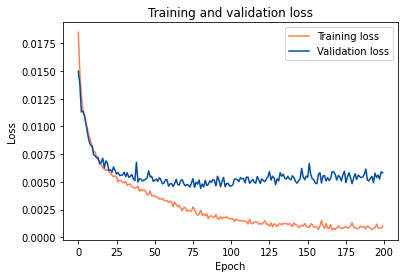

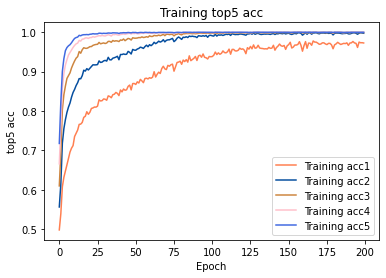

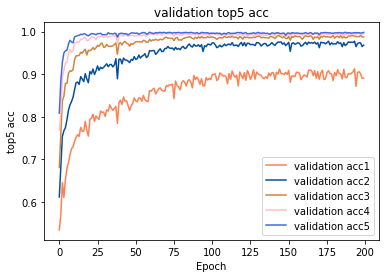

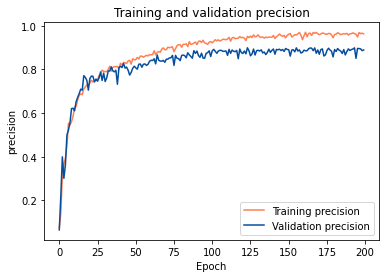

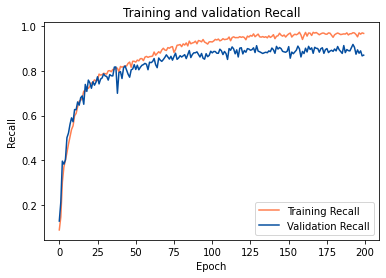

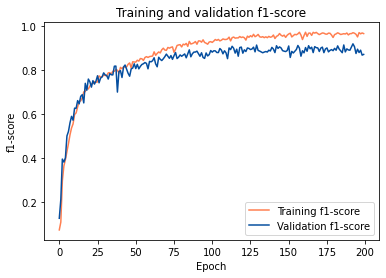

1637248785.8731678


In [71]:
# training for 3 epochs
start = time.time()
print(start)
n_epochs = 200
train(alexnet, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

### flod3(train) 

1637248887.905501
-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0189 	 valid Loss: 0.0153
train acc1: 0.4951 	 valid acc1: 0.5371
train acc2: 0.5406 	 valid acc2: 0.6150
train acc3: 0.5965 	 valid acc3: 0.6971
train acc4: 0.6479 	 valid acc4: 0.7500
train acc5: 0.6963 	 valid acc5: 0.8075
train precision: 0.0861 	 valid precision: 0.0484
train recall: 0.0868 	 valid recall: 0.1250
train f1-score: 0.0725 	 valid f1-score: 0.0644
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0151 	 valid Loss: 0.0146
train acc1: 0.5300 	 valid acc1: 0.5393
train acc2: 0.6006 	 valid acc2: 0.6132
train acc3: 0.6698 	 valid acc3: 0.6936
train acc4: 0.7413 	 valid acc4: 0.7821
train acc5: 0.8120 	 valid acc5: 0.8429
train precision: 0.1236 	 valid precision: 0.1111
train recall: 0.1262 	 valid recall: 0.1299
train f1-score: 0.0946 	 valid f1-score: 0.0737
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0143 	 valid Loss: 0.0127
train acc1: 0.5557 	 valid acc1: 0.6007
train acc2: 0.6554 	 valid acc2: 0.7218
train acc3: 0.7357 	 valid acc3: 0.8025
train acc4: 0.8089 	 valid acc4: 0.8736
train acc5: 0.8604 	 valid acc5: 0.9089
train precision: 0.2016 	 valid precision: 0.1842
train recall: 0.1846 	 valid recall: 0.2816
train f1-score: 0.1754 	 valid f1-score: 0.2105
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0124 	 valid Loss: 0.0114
train acc1: 0.6015 	 valid acc1: 0.6386
train acc2: 0.7232 	 valid acc2: 0.7582
train acc3: 0.8201 	 valid acc3: 0.8554
train acc4: 0.8825 	 valid acc4: 0.9089
train acc5: 0.9262 	 valid acc5: 0.9436
train precision: 0.2810 	 valid precision: 0.3056
train recall: 0.2997 	 valid recall: 0.3461
train f1-score: 0.2724 	 valid f1-score: 0.3061
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0115 	 valid Loss: 0.0106
train acc1: 0.6379 	 valid acc1: 0.6611
train acc2: 0.7576 	 valid acc2: 0.7907
train acc3: 0.8540 	 valid acc3: 0.8800
train acc4: 0.9105 	 valid acc4: 0.9304
train acc5: 0.9483 	 valid acc5: 0.9607
train precision: 0.3743 	 valid precision: 0.4300
train recall: 0.3786 	 valid recall: 0.4439
train f1-score: 0.3683 	 valid f1-score: 0.4044
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0106 	 valid Loss: 0.0104
train acc1: 0.6638 	 valid acc1: 0.6829
train acc2: 0.7812 	 valid acc2: 0.7871
train acc3: 0.8694 	 valid acc3: 0.8786
train acc4: 0.9260 	 valid acc4: 0.9236
train acc5: 0.9592 	 valid acc5: 0.9511
train precision: 0.4204 	 valid precision: 0.4842
train recall: 0.4339 	 valid recall: 0.4473
train f1-score: 0.4229 	 valid f1-score: 0.4233
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0102 	 valid Loss: 0.0099
train acc1: 0.6739 	 valid acc1: 0.6682
train acc2: 0.7969 	 valid acc2: 0.8129
train acc3: 0.8804 	 valid acc3: 0.8875
train acc4: 0.9365 	 valid acc4: 0.9371
train acc5: 0.9632 	 valid acc5: 0.9625
train precision: 0.4433 	 valid precision: 0.4538
train recall: 0.4577 	 valid recall: 0.4914
train f1-score: 0.4468 	 valid f1-score: 0.4594
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0097 	 valid Loss: 0.0096
train acc1: 0.6899 	 valid acc1: 0.7014
train acc2: 0.8090 	 valid acc2: 0.8171
train acc3: 0.8882 	 valid acc3: 0.9014
train acc4: 0.9390 	 valid acc4: 0.9471
train acc5: 0.9663 	 valid acc5: 0.9700
train precision: 0.4765 	 valid precision: 0.5041
train recall: 0.4924 	 valid recall: 0.5167
train f1-score: 0.4818 	 valid f1-score: 0.5038
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0093 	 valid Loss: 0.0090
train acc1: 0.6981 	 valid acc1: 0.7061
train acc2: 0.8219 	 valid acc2: 0.8268
train acc3: 0.8956 	 valid acc3: 0.9104
train acc4: 0.9458 	 valid acc4: 0.9561
train acc5: 0.9704 	 valid acc5: 0.9761
train precision: 0.5212 	 valid precision: 0.5607
train recall: 0.5057 	 valid recall: 0.4953
train f1-score: 0.4987 	 valid f1-score: 0.4953
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0090 	 valid Loss: 0.0096
train acc1: 0.6987 	 valid acc1: 0.7036
train acc2: 0.8269 	 valid acc2: 0.8279
train acc3: 0.8977 	 valid acc3: 0.9075
train acc4: 0.9507 	 valid acc4: 0.9514
train acc5: 0.9717 	 valid acc5: 0.9718
train precision: 0.5417 	 valid precision: 0.4785
train recall: 0.5252 	 valid recall: 0.4938
train f1-score: 0.5181 	 valid f1-score: 0.4819
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0083 	 valid Loss: 0.0078
train acc1: 0.7243 	 valid acc1: 0.7446
train acc2: 0.8432 	 valid acc2: 0.8618
train acc3: 0.9161 	 valid acc3: 0.9304
train acc4: 0.9619 	 valid acc4: 0.9657
train acc5: 0.9806 	 valid acc5: 0.9807
train precision: 0.5875 	 valid precision: 0.5916
train recall: 0.5742 	 valid recall: 0.6096
train f1-score: 0.5734 	 valid f1-score: 0.5907
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0080 	 valid Loss: 0.0081
train acc1: 0.7377 	 valid acc1: 0.7354
train acc2: 0.8590 	 valid acc2: 0.8654
train acc3: 0.9323 	 valid acc3: 0.9329
train acc4: 0.9696 	 valid acc4: 0.9729
train acc5: 0.9833 	 valid acc5: 0.9850
train precision: 0.5903 	 valid precision: 0.6032
train recall: 0.5966 	 valid recall: 0.6150
train f1-score: 0.5864 	 valid f1-score: 0.5889
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0077 	 valid Loss: 0.0076
train acc1: 0.7405 	 valid acc1: 0.7443
train acc2: 0.8602 	 valid acc2: 0.8654
train acc3: 0.9327 	 valid acc3: 0.9343
train acc4: 0.9715 	 valid acc4: 0.9736
train acc5: 0.9854 	 valid acc5: 0.9864
train precision: 0.6091 	 valid precision: 0.6154
train recall: 0.6118 	 valid recall: 0.6418
train f1-score: 0.6017 	 valid f1-score: 0.6119
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0072 	 valid Loss: 0.0075
train acc1: 0.7571 	 valid acc1: 0.7489
train acc2: 0.8708 	 valid acc2: 0.8686
train acc3: 0.9446 	 valid acc3: 0.9400
train acc4: 0.9765 	 valid acc4: 0.9736
train acc5: 0.9892 	 valid acc5: 0.9857
train precision: 0.6802 	 valid precision: 0.6486
train recall: 0.6435 	 valid recall: 0.6488
train f1-score: 0.6317 	 valid f1-score: 0.6365
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0072 	 valid Loss: 0.0072
train acc1: 0.7586 	 valid acc1: 0.7568
train acc2: 0.8733 	 valid acc2: 0.8839
train acc3: 0.9423 	 valid acc3: 0.9496
train acc4: 0.9763 	 valid acc4: 0.9761
train acc5: 0.9877 	 valid acc5: 0.9879
train precision: 0.6542 	 valid precision: 0.6401
train recall: 0.6429 	 valid recall: 0.6698
train f1-score: 0.6297 	 valid f1-score: 0.6445
-------第 16 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0069 	 valid Loss: 0.0074
train acc1: 0.7614 	 valid acc1: 0.7471
train acc2: 0.8837 	 valid acc2: 0.8704
train acc3: 0.9505 	 valid acc3: 0.9386
train acc4: 0.9821 	 valid acc4: 0.9693
train acc5: 0.9914 	 valid acc5: 0.9846
train precision: 0.6545 	 valid precision: 0.6418
train recall: 0.6538 	 valid recall: 0.6542
train f1-score: 0.6408 	 valid f1-score: 0.6304
-------第 17 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0065 	 valid Loss: 0.0067
train acc1: 0.7743 	 valid acc1: 0.7707
train acc2: 0.8877 	 valid acc2: 0.8900
train acc3: 0.9532 	 valid acc3: 0.9471
train acc4: 0.9844 	 valid acc4: 0.9793
train acc5: 0.9931 	 valid acc5: 0.9879
train precision: 0.6866 	 valid precision: 0.6510
train recall: 0.6743 	 valid recall: 0.6988
train f1-score: 0.6631 	 valid f1-score: 0.6679
-------第 18 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0067 	 valid Loss: 0.0069
train acc1: 0.7692 	 valid acc1: 0.7607
train acc2: 0.8842 	 valid acc2: 0.8768
train acc3: 0.9490 	 valid acc3: 0.9536
train acc4: 0.9804 	 valid acc4: 0.9821
train acc5: 0.9917 	 valid acc5: 0.9904
train precision: 0.6800 	 valid precision: 0.6791
train recall: 0.6739 	 valid recall: 0.6425
train f1-score: 0.6581 	 valid f1-score: 0.6398
-------第 19 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0066 	 valid Loss: 0.0071
train acc1: 0.7705 	 valid acc1: 0.7636
train acc2: 0.8867 	 valid acc2: 0.8818
train acc3: 0.9545 	 valid acc3: 0.9504
train acc4: 0.9844 	 valid acc4: 0.9804
train acc5: 0.9936 	 valid acc5: 0.9900
train precision: 0.6922 	 valid precision: 0.6865
train recall: 0.6795 	 valid recall: 0.6339
train f1-score: 0.6659 	 valid f1-score: 0.6494
-------第 20 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0063 	 valid Loss: 0.0066
train acc1: 0.7805 	 valid acc1: 0.7686
train acc2: 0.8915 	 valid acc2: 0.8889
train acc3: 0.9543 	 valid acc3: 0.9564
train acc4: 0.9840 	 valid acc4: 0.9807
train acc5: 0.9933 	 valid acc5: 0.9907
train precision: 0.6997 	 valid precision: 0.6926
train recall: 0.6952 	 valid recall: 0.6629
train f1-score: 0.6851 	 valid f1-score: 0.6501
-------第 21 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0061 	 valid Loss: 0.0070
train acc1: 0.7838 	 valid acc1: 0.7582
train acc2: 0.8994 	 valid acc2: 0.8811
train acc3: 0.9577 	 valid acc3: 0.9479
train acc4: 0.9850 	 valid acc4: 0.9736
train acc5: 0.9944 	 valid acc5: 0.9850
train precision: 0.7108 	 valid precision: 0.7004
train recall: 0.7031 	 valid recall: 0.6870
train f1-score: 0.6905 	 valid f1-score: 0.6658
-------第 22 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0063 	 valid Loss: 0.0065
train acc1: 0.7793 	 valid acc1: 0.7857
train acc2: 0.8950 	 valid acc2: 0.9007
train acc3: 0.9544 	 valid acc3: 0.9529
train acc4: 0.9829 	 valid acc4: 0.9782
train acc5: 0.9920 	 valid acc5: 0.9889
train precision: 0.7070 	 valid precision: 0.7316
train recall: 0.7001 	 valid recall: 0.7473
train f1-score: 0.6903 	 valid f1-score: 0.7283
-------第 23 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0062 	 valid Loss: 0.0063
train acc1: 0.7812 	 valid acc1: 0.7821
train acc2: 0.8976 	 valid acc2: 0.9018
train acc3: 0.9612 	 valid acc3: 0.9557
train acc4: 0.9860 	 valid acc4: 0.9818
train acc5: 0.9946 	 valid acc5: 0.9936
train precision: 0.7075 	 valid precision: 0.7615
train recall: 0.7079 	 valid recall: 0.6947
train f1-score: 0.6991 	 valid f1-score: 0.7087
-------第 24 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0058 	 valid Loss: 0.0061
train acc1: 0.7977 	 valid acc1: 0.7996
train acc2: 0.9083 	 valid acc2: 0.9107
train acc3: 0.9639 	 valid acc3: 0.9614
train acc4: 0.9880 	 valid acc4: 0.9850
train acc5: 0.9964 	 valid acc5: 0.9932
train precision: 0.7307 	 valid precision: 0.7471
train recall: 0.7336 	 valid recall: 0.7628
train f1-score: 0.7226 	 valid f1-score: 0.7468
-------第 25 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0058 	 valid Loss: 0.0062
train acc1: 0.8002 	 valid acc1: 0.7886
train acc2: 0.9096 	 valid acc2: 0.9043
train acc3: 0.9629 	 valid acc3: 0.9668
train acc4: 0.9883 	 valid acc4: 0.9850
train acc5: 0.9956 	 valid acc5: 0.9929
train precision: 0.7349 	 valid precision: 0.7382
train recall: 0.7417 	 valid recall: 0.7079
train f1-score: 0.7316 	 valid f1-score: 0.7133
-------第 26 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0058 	 valid Loss: 0.0065
train acc1: 0.7996 	 valid acc1: 0.7889
train acc2: 0.9106 	 valid acc2: 0.9054
train acc3: 0.9635 	 valid acc3: 0.9564
train acc4: 0.9875 	 valid acc4: 0.9832
train acc5: 0.9949 	 valid acc5: 0.9954
train precision: 0.7310 	 valid precision: 0.7650
train recall: 0.7379 	 valid recall: 0.7062
train f1-score: 0.7270 	 valid f1-score: 0.7023
-------第 27 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0056 	 valid Loss: 0.0067
train acc1: 0.8001 	 valid acc1: 0.7714
train acc2: 0.9132 	 valid acc2: 0.8904
train acc3: 0.9665 	 valid acc3: 0.9611
train acc4: 0.9900 	 valid acc4: 0.9836
train acc5: 0.9971 	 valid acc5: 0.9900
train precision: 0.7450 	 valid precision: 0.7154
train recall: 0.7363 	 valid recall: 0.7089
train f1-score: 0.7287 	 valid f1-score: 0.7005
-------第 28 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0055 	 valid Loss: 0.0059
train acc1: 0.8117 	 valid acc1: 0.8039
train acc2: 0.9181 	 valid acc2: 0.9175
train acc3: 0.9663 	 valid acc3: 0.9646
train acc4: 0.9898 	 valid acc4: 0.9875
train acc5: 0.9961 	 valid acc5: 0.9939
train precision: 0.7772 	 valid precision: 0.7613
train recall: 0.7616 	 valid recall: 0.7550
train f1-score: 0.7511 	 valid f1-score: 0.7510
-------第 29 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0053 	 valid Loss: 0.0060
train acc1: 0.8113 	 valid acc1: 0.8068
train acc2: 0.9202 	 valid acc2: 0.9143
train acc3: 0.9704 	 valid acc3: 0.9657
train acc4: 0.9910 	 valid acc4: 0.9861
train acc5: 0.9965 	 valid acc5: 0.9946
train precision: 0.7611 	 valid precision: 0.7648
train recall: 0.7596 	 valid recall: 0.7571
train f1-score: 0.7487 	 valid f1-score: 0.7548
-------第 30 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0055 	 valid Loss: 0.0058
train acc1: 0.8102 	 valid acc1: 0.8111
train acc2: 0.9135 	 valid acc2: 0.9186
train acc3: 0.9671 	 valid acc3: 0.9629
train acc4: 0.9890 	 valid acc4: 0.9864
train acc5: 0.9964 	 valid acc5: 0.9946
train precision: 0.7439 	 valid precision: 0.7746
train recall: 0.7603 	 valid recall: 0.7524
train f1-score: 0.7466 	 valid f1-score: 0.7542
-------第 31 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0052 	 valid Loss: 0.0058
train acc1: 0.8161 	 valid acc1: 0.8032
train acc2: 0.9227 	 valid acc2: 0.9089
train acc3: 0.9710 	 valid acc3: 0.9632
train acc4: 0.9920 	 valid acc4: 0.9832
train acc5: 0.9974 	 valid acc5: 0.9929
train precision: 0.7649 	 valid precision: 0.7401
train recall: 0.7694 	 valid recall: 0.7842
train f1-score: 0.7567 	 valid f1-score: 0.7547
-------第 32 轮训练开始-------
train Loss: 0.0052 	 valid Loss: 0.0065
train acc1: 0.8180 	 valid acc1: 0.7864
train acc2: 0.9242 	 valid acc2: 0.8943
train acc3: 0.9721 	 valid acc3: 0.9586
train acc4: 0.9912 	 valid acc4: 0.9814
train acc5: 0.9979 	 valid acc5: 0.9925
train precision: 0.7583 	 valid precision: 0.7281
train recall: 0.7762 	 valid recall: 0.7002
train f1-score: 0.7615 	 valid f1-score: 0.6850
-------第 33 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0052 	 valid Loss: 0.0056
train acc1: 0.8206 	 valid acc1: 0.8125
train acc2: 0.9221 	 valid acc2: 0.9236
train acc3: 0.9699 	 valid acc3: 0.9700
train acc4: 0.9911 	 valid acc4: 0.9868
train acc5: 0.9979 	 valid acc5: 0.9964
train precision: 0.7693 	 valid precision: 0.7598
train recall: 0.7724 	 valid recall: 0.7650
train f1-score: 0.7615 	 valid f1-score: 0.7519
-------第 34 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0050 	 valid Loss: 0.0058
train acc1: 0.8238 	 valid acc1: 0.8104
train acc2: 0.9260 	 valid acc2: 0.9196
train acc3: 0.9714 	 valid acc3: 0.9696
train acc4: 0.9906 	 valid acc4: 0.9871
train acc5: 0.9968 	 valid acc5: 0.9957
train precision: 0.7650 	 valid precision: 0.7862
train recall: 0.7804 	 valid recall: 0.7434
train f1-score: 0.7684 	 valid f1-score: 0.7536
-------第 35 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0050 	 valid Loss: 0.0056
train acc1: 0.8248 	 valid acc1: 0.8111
train acc2: 0.9276 	 valid acc2: 0.9204
train acc3: 0.9740 	 valid acc3: 0.9711
train acc4: 0.9936 	 valid acc4: 0.9868
train acc5: 0.9983 	 valid acc5: 0.9929
train precision: 0.7634 	 valid precision: 0.7629
train recall: 0.7797 	 valid recall: 0.7737
train f1-score: 0.7671 	 valid f1-score: 0.7555
-------第 36 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0048 	 valid Loss: 0.0064
train acc1: 0.8336 	 valid acc1: 0.7982
train acc2: 0.9345 	 valid acc2: 0.9107
train acc3: 0.9774 	 valid acc3: 0.9607
train acc4: 0.9932 	 valid acc4: 0.9868
train acc5: 0.9983 	 valid acc5: 0.9964
train precision: 0.7847 	 valid precision: 0.7705
train recall: 0.7947 	 valid recall: 0.7308
train f1-score: 0.7826 	 valid f1-score: 0.7278
-------第 37 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0049 	 valid Loss: 0.0059
train acc1: 0.8273 	 valid acc1: 0.8093
train acc2: 0.9310 	 valid acc2: 0.9254
train acc3: 0.9763 	 valid acc3: 0.9700
train acc4: 0.9933 	 valid acc4: 0.9875
train acc5: 0.9977 	 valid acc5: 0.9932
train precision: 0.7734 	 valid precision: 0.7627
train recall: 0.7877 	 valid recall: 0.7700
train f1-score: 0.7729 	 valid f1-score: 0.7591
-------第 38 轮训练开始-------
train Loss: 0.0048 	 valid Loss: 0.0056
train acc1: 0.8296 	 valid acc1: 0.8218
train acc2: 0.9301 	 valid acc2: 0.9196
train acc3: 0.9738 	 valid acc3: 0.9689
train acc4: 0.9938 	 valid acc4: 0.9893
train acc5: 0.9982 	 valid acc5: 0.9946
train precision: 0.8017 	 valid precision: 0.7854
train recall: 0.7890 	 valid recall: 0.7719
train f1-score: 0.7766 	 valid f1-score: 0.7759
-------第 39 轮训练开始-------
train Loss: 0.0048 	 valid Loss: 0.0056
train acc1: 0.8339 	 valid acc1: 0.8157
train acc2: 0.9363 	 valid acc2: 0.9225
train acc3: 0.9782 	 valid acc3: 0.9682
train acc4: 0.9924 	 valid

train Loss: 0.0033 	 valid Loss: 0.0051
train acc1: 0.8806 	 valid acc1: 0.8418
train acc2: 0.9723 	 valid acc2: 0.9482
train acc3: 0.9918 	 valid acc3: 0.9800
train acc4: 0.9985 	 valid acc4: 0.9907
train acc5: 0.9995 	 valid acc5: 0.9971
train precision: 0.8632 	 valid precision: 0.8118
train recall: 0.8566 	 valid recall: 0.8185
train f1-score: 0.8538 	 valid f1-score: 0.8118
-------第 59 轮训练开始-------
train Loss: 0.0032 	 valid Loss: 0.0052
train acc1: 0.8883 	 valid acc1: 0.8393
train acc2: 0.9720 	 valid acc2: 0.9529
train acc3: 0.9919 	 valid acc3: 0.9793
train acc4: 0.9987 	 valid acc4: 0.9904
train acc5: 0.9996 	 valid acc5: 0.9946
train precision: 0.8699 	 valid precision: 0.8167
train recall: 0.8669 	 valid recall: 0.8316
train f1-score: 0.8646 	 valid f1-score: 0.8144
-------第 60 轮训练开始-------
train Loss: 0.0032 	 valid Loss: 0.0052
train acc1: 0.8879 	 valid acc1: 0.8461
train acc2: 0.9705 	 valid acc2: 0.9521
train acc3: 0.9904 	 valid acc3: 0.9804
train acc4: 0.9969 	 valid

train Loss: 0.0021 	 valid Loss: 0.0050
train acc1: 0.9263 	 valid acc1: 0.8711
train acc2: 0.9876 	 valid acc2: 0.9661
train acc3: 0.9979 	 valid acc3: 0.9843
train acc4: 0.9993 	 valid acc4: 0.9925
train acc5: 0.9996 	 valid acc5: 0.9950
train precision: 0.9161 	 valid precision: 0.8523
train recall: 0.9163 	 valid recall: 0.8637
train f1-score: 0.9155 	 valid f1-score: 0.8547
-------第 80 轮训练开始-------
train Loss: 0.0021 	 valid Loss: 0.0057
train acc1: 0.9287 	 valid acc1: 0.8521
train acc2: 0.9887 	 valid acc2: 0.9546
train acc3: 0.9968 	 valid acc3: 0.9850
train acc4: 0.9992 	 valid acc4: 0.9932
train acc5: 0.9998 	 valid acc5: 0.9954
train precision: 0.9168 	 valid precision: 0.8282
train recall: 0.9183 	 valid recall: 0.8337
train f1-score: 0.9166 	 valid f1-score: 0.8246
-------第 81 轮训练开始-------
train Loss: 0.0023 	 valid Loss: 0.0053
train acc1: 0.9214 	 valid acc1: 0.8711
train acc2: 0.9873 	 valid acc2: 0.9621
train acc3: 0.9962 	 valid acc3: 0.9821
train acc4: 0.9983 	 valid

train Loss: 0.0016 	 valid Loss: 0.0061
train acc1: 0.9449 	 valid acc1: 0.8636
train acc2: 0.9938 	 valid acc2: 0.9604
train acc3: 0.9986 	 valid acc3: 0.9807
train acc4: 0.9993 	 valid acc4: 0.9896
train acc5: 0.9995 	 valid acc5: 0.9921
train precision: 0.9319 	 valid precision: 0.8562
train recall: 0.9383 	 valid recall: 0.8520
train f1-score: 0.9348 	 valid f1-score: 0.8534
-------第 101 轮训练开始-------
train Loss: 0.0015 	 valid Loss: 0.0055
train acc1: 0.9477 	 valid acc1: 0.8904
train acc2: 0.9938 	 valid acc2: 0.9714
train acc3: 0.9985 	 valid acc3: 0.9879
train acc4: 0.9995 	 valid acc4: 0.9929
train acc5: 0.9998 	 valid acc5: 0.9943
train precision: 0.9382 	 valid precision: 0.8791
train recall: 0.9431 	 valid recall: 0.8806
train f1-score: 0.9403 	 valid f1-score: 0.8784
-------第 102 轮训练开始-------
train Loss: 0.0017 	 valid Loss: 0.0061
train acc1: 0.9430 	 valid acc1: 0.8650
train acc2: 0.9931 	 valid acc2: 0.9629
train acc3: 0.9971 	 valid acc3: 0.9814
train acc4: 0.9992 	 val

train Loss: 0.0013 	 valid Loss: 0.0063
train acc1: 0.9542 	 valid acc1: 0.8639
train acc2: 0.9956 	 valid acc2: 0.9564
train acc3: 0.9992 	 valid acc3: 0.9836
train acc4: 0.9998 	 valid acc4: 0.9904
train acc5: 0.9999 	 valid acc5: 0.9943
train precision: 0.9445 	 valid precision: 0.8430
train recall: 0.9482 	 valid recall: 0.8654
train f1-score: 0.9462 	 valid f1-score: 0.8466
-------第 122 轮训练开始-------
train Loss: 0.0014 	 valid Loss: 0.0056
train acc1: 0.9542 	 valid acc1: 0.8946
train acc2: 0.9937 	 valid acc2: 0.9675
train acc3: 0.9986 	 valid acc3: 0.9871
train acc4: 0.9999 	 valid acc4: 0.9925
train acc5: 1.0000 	 valid acc5: 0.9954
train precision: 0.9437 	 valid precision: 0.8813
train recall: 0.9476 	 valid recall: 0.8942
train f1-score: 0.9454 	 valid f1-score: 0.8858
-------第 123 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0061
train acc1: 0.9561 	 valid acc1: 0.8889
train acc2: 0.9952 	 valid acc2: 0.9654
train acc3: 0.9990 	 valid acc3: 0.9850
train acc4: 0.9998 	 val

train Loss: 0.0010 	 valid Loss: 0.0064
train acc1: 0.9633 	 valid acc1: 0.8789
train acc2: 0.9971 	 valid acc2: 0.9693
train acc3: 0.9996 	 valid acc3: 0.9868
train acc4: 0.9999 	 valid acc4: 0.9925
train acc5: 1.0000 	 valid acc5: 0.9946
train precision: 0.9542 	 valid precision: 0.8657
train recall: 0.9635 	 valid recall: 0.8714
train f1-score: 0.9586 	 valid f1-score: 0.8660
-------第 143 轮训练开始-------
train Loss: 0.0013 	 valid Loss: 0.0061
train acc1: 0.9557 	 valid acc1: 0.8918
train acc2: 0.9952 	 valid acc2: 0.9664
train acc3: 0.9994 	 valid acc3: 0.9861
train acc4: 0.9996 	 valid acc4: 0.9918
train acc5: 0.9998 	 valid acc5: 0.9936
train precision: 0.9452 	 valid precision: 0.8826
train recall: 0.9508 	 valid recall: 0.8756
train f1-score: 0.9479 	 valid f1-score: 0.8785
-------第 144 轮训练开始-------
train Loss: 0.0010 	 valid Loss: 0.0060
train acc1: 0.9635 	 valid acc1: 0.8961
train acc2: 0.9967 	 valid acc2: 0.9679
train acc3: 0.9994 	 valid acc3: 0.9854
train acc4: 0.9995 	 val

train Loss: 0.0010 	 valid Loss: 0.0061
train acc1: 0.9683 	 valid acc1: 0.8975
train acc2: 0.9974 	 valid acc2: 0.9707
train acc3: 0.9994 	 valid acc3: 0.9850
train acc4: 0.9998 	 valid acc4: 0.9918
train acc5: 0.9999 	 valid acc5: 0.9936
train precision: 0.9603 	 valid precision: 0.8860
train recall: 0.9657 	 valid recall: 0.8856
train f1-score: 0.9629 	 valid f1-score: 0.8848
-------第 164 轮训练开始-------
train Loss: 0.0008 	 valid Loss: 0.0066
train acc1: 0.9714 	 valid acc1: 0.9021
train acc2: 0.9975 	 valid acc2: 0.9707
train acc3: 0.9994 	 valid acc3: 0.9864
train acc4: 0.9998 	 valid acc4: 0.9925
train acc5: 0.9999 	 valid acc5: 0.9946
train precision: 0.9636 	 valid precision: 0.8928
train recall: 0.9667 	 valid recall: 0.8917
train f1-score: 0.9650 	 valid f1-score: 0.8907
-------第 165 轮训练开始-------
train Loss: 0.0008 	 valid Loss: 0.0070
train acc1: 0.9708 	 valid acc1: 0.8968
train acc2: 0.9973 	 valid acc2: 0.9668
train acc3: 0.9994 	 valid acc3: 0.9861
train acc4: 0.9999 	 val

train Loss: 0.0010 	 valid Loss: 0.0065
train acc1: 0.9680 	 valid acc1: 0.8764
train acc2: 0.9954 	 valid acc2: 0.9589
train acc3: 0.9990 	 valid acc3: 0.9811
train acc4: 0.9998 	 valid acc4: 0.9886
train acc5: 0.9999 	 valid acc5: 0.9932
train precision: 0.9594 	 valid precision: 0.8611
train recall: 0.9659 	 valid recall: 0.8648
train f1-score: 0.9625 	 valid f1-score: 0.8610
-------第 185 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0065
train acc1: 0.9721 	 valid acc1: 0.8982
train acc2: 0.9975 	 valid acc2: 0.9711
train acc3: 0.9989 	 valid acc3: 0.9850
train acc4: 0.9994 	 valid acc4: 0.9900
train acc5: 0.9998 	 valid acc5: 0.9939
train precision: 0.9644 	 valid precision: 0.8827
train recall: 0.9710 	 valid recall: 0.8968
train f1-score: 0.9676 	 valid f1-score: 0.8888
-------第 186 轮训练开始-------
train Loss: 0.0010 	 valid Loss: 0.0063
train acc1: 0.9701 	 valid acc1: 0.8968
train acc2: 0.9970 	 valid acc2: 0.9686
train acc3: 0.9996 	 valid acc3: 0.9850
train acc4: 0.9999 	 val

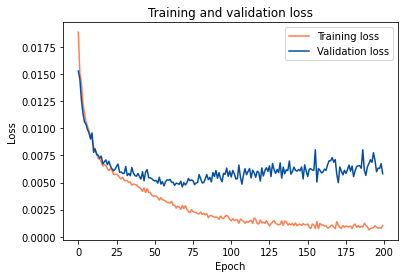

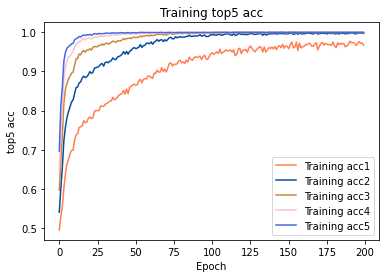

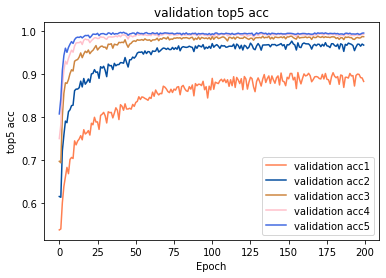

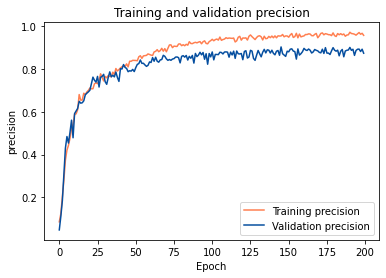

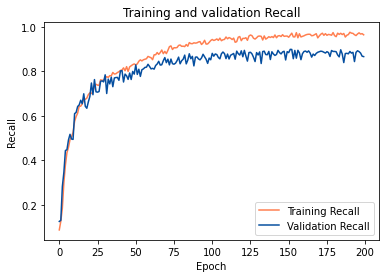

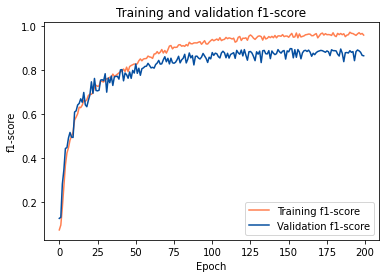

1637249832.907913


In [89]:
# training for 3 epochs
start = time.time()
print(start)
n_epochs = 200
train(alexnet, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

### flod4(train)

1637249931.6265259
-------第 1 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0193 	 valid Loss: 0.0148
train acc1: 0.4918 	 valid acc1: 0.5446
train acc2: 0.5395 	 valid acc2: 0.6071
train acc3: 0.5902 	 valid acc3: 0.6750
train acc4: 0.6454 	 valid acc4: 0.7264
train acc5: 0.6932 	 valid acc5: 0.7993
train precision: 0.0595 	 valid precision: 0.0490
train recall: 0.0816 	 valid recall: 0.1250
train f1-score: 0.0629 	 valid f1-score: 0.0649
-------第 2 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0151 	 valid Loss: 0.0136
train acc1: 0.5246 	 valid acc1: 0.5900
train acc2: 0.6067 	 valid acc2: 0.6604
train acc3: 0.6882 	 valid acc3: 0.7471
train acc4: 0.7561 	 valid acc4: 0.8114
train acc5: 0.8257 	 valid acc5: 0.8750
train precision: 0.1594 	 valid precision: 0.2274
train recall: 0.1377 	 valid recall: 0.2514
train f1-score: 0.0925 	 valid f1-score: 0.1849
-------第 3 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0132 	 valid Loss: 0.0120
train acc1: 0.5858 	 valid acc1: 0.6429
train acc2: 0.7071 	 valid acc2: 0.7418
train acc3: 0.8013 	 valid acc3: 0.8114
train acc4: 0.8613 	 valid acc4: 0.8704
train acc5: 0.9095 	 valid acc5: 0.9082
train precision: 0.2674 	 valid precision: 0.3086
train recall: 0.2790 	 valid recall: 0.3445
train f1-score: 0.2647 	 valid f1-score: 0.3090
-------第 4 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0118 	 valid Loss: 0.0110
train acc1: 0.6236 	 valid acc1: 0.6643
train acc2: 0.7515 	 valid acc2: 0.7750
train acc3: 0.8401 	 valid acc3: 0.8671
train acc4: 0.8965 	 valid acc4: 0.9236
train acc5: 0.9349 	 valid acc5: 0.9568
train precision: 0.3487 	 valid precision: 0.3839
train recall: 0.3566 	 valid recall: 0.4246
train f1-score: 0.3460 	 valid f1-score: 0.3790
-------第 5 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0110 	 valid Loss: 0.0102
train acc1: 0.6449 	 valid acc1: 0.6814
train acc2: 0.7787 	 valid acc2: 0.8079
train acc3: 0.8636 	 valid acc3: 0.8664
train acc4: 0.9194 	 valid acc4: 0.9314
train acc5: 0.9561 	 valid acc5: 0.9596
train precision: 0.3886 	 valid precision: 0.4272
train recall: 0.4007 	 valid recall: 0.4422
train f1-score: 0.3877 	 valid f1-score: 0.4222
-------第 6 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0104 	 valid Loss: 0.0096
train acc1: 0.6619 	 valid acc1: 0.6907
train acc2: 0.7987 	 valid acc2: 0.8196
train acc3: 0.8792 	 valid acc3: 0.8932
train acc4: 0.9299 	 valid acc4: 0.9400
train acc5: 0.9611 	 valid acc5: 0.9646
train precision: 0.4263 	 valid precision: 0.4975
train recall: 0.4359 	 valid recall: 0.4808
train f1-score: 0.4250 	 valid f1-score: 0.4554
-------第 7 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0101 	 valid Loss: 0.0096
train acc1: 0.6667 	 valid acc1: 0.6900
train acc2: 0.8130 	 valid acc2: 0.8264
train acc3: 0.8946 	 valid acc3: 0.8993
train acc4: 0.9427 	 valid acc4: 0.9454
train acc5: 0.9673 	 valid acc5: 0.9689
train precision: 0.4536 	 valid precision: 0.5210
train recall: 0.4469 	 valid recall: 0.5074
train f1-score: 0.4362 	 valid f1-score: 0.4870
-------第 8 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0095 	 valid Loss: 0.0094
train acc1: 0.6844 	 valid acc1: 0.6782
train acc2: 0.8232 	 valid acc2: 0.8182
train acc3: 0.9045 	 valid acc3: 0.9004
train acc4: 0.9535 	 valid acc4: 0.9439
train acc5: 0.9762 	 valid acc5: 0.9725
train precision: 0.4751 	 valid precision: 0.4521
train recall: 0.4842 	 valid recall: 0.4418
train f1-score: 0.4742 	 valid f1-score: 0.4223
-------第 9 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0092 	 valid Loss: 0.0087
train acc1: 0.6857 	 valid acc1: 0.7121
train acc2: 0.8277 	 valid acc2: 0.8439
train acc3: 0.9088 	 valid acc3: 0.9221
train acc4: 0.9594 	 valid acc4: 0.9643
train acc5: 0.9798 	 valid acc5: 0.9768
train precision: 0.4866 	 valid precision: 0.5203
train recall: 0.4974 	 valid recall: 0.5565
train f1-score: 0.4862 	 valid f1-score: 0.5252
-------第 10 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0087 	 valid Loss: 0.0086
train acc1: 0.7019 	 valid acc1: 0.7136
train acc2: 0.8386 	 valid acc2: 0.8346
train acc3: 0.9193 	 valid acc3: 0.9168
train acc4: 0.9642 	 valid acc4: 0.9586
train acc5: 0.9811 	 valid acc5: 0.9754
train precision: 0.5655 	 valid precision: 0.5733
train recall: 0.5378 	 valid recall: 0.5881
train f1-score: 0.5363 	 valid f1-score: 0.5516
-------第 11 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0082 	 valid Loss: 0.0083
train acc1: 0.7206 	 valid acc1: 0.7482
train acc2: 0.8498 	 valid acc2: 0.8679
train acc3: 0.9269 	 valid acc3: 0.9339
train acc4: 0.9660 	 valid acc4: 0.9646
train acc5: 0.9839 	 valid acc5: 0.9768
train precision: 0.6084 	 valid precision: 0.6053
train recall: 0.5831 	 valid recall: 0.5878
train f1-score: 0.5815 	 valid f1-score: 0.5887
-------第 12 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0077 	 valid Loss: 0.0074
train acc1: 0.7346 	 valid acc1: 0.7486
train acc2: 0.8599 	 valid acc2: 0.8689
train acc3: 0.9342 	 valid acc3: 0.9407
train acc4: 0.9732 	 valid acc4: 0.9746
train acc5: 0.9877 	 valid acc5: 0.9854
train precision: 0.6451 	 valid precision: 0.6382
train recall: 0.6007 	 valid recall: 0.6318
train f1-score: 0.5960 	 valid f1-score: 0.6087
-------第 13 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0073 	 valid Loss: 0.0073
train acc1: 0.7442 	 valid acc1: 0.7486
train acc2: 0.8700 	 valid acc2: 0.8764
train acc3: 0.9431 	 valid acc3: 0.9493
train acc4: 0.9783 	 valid acc4: 0.9757
train acc5: 0.9911 	 valid acc5: 0.9857
train precision: 0.6515 	 valid precision: 0.6788
train recall: 0.6312 	 valid recall: 0.6338
train f1-score: 0.6249 	 valid f1-score: 0.6279
-------第 14 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0071 	 valid Loss: 0.0072
train acc1: 0.7567 	 valid acc1: 0.7518
train acc2: 0.8793 	 valid acc2: 0.8761
train acc3: 0.9477 	 valid acc3: 0.9389
train acc4: 0.9814 	 valid acc4: 0.9721
train acc5: 0.9913 	 valid acc5: 0.9850
train precision: 0.6662 	 valid precision: 0.6452
train recall: 0.6519 	 valid recall: 0.6245
train f1-score: 0.6471 	 valid f1-score: 0.6130
-------第 15 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0068 	 valid Loss: 0.0067
train acc1: 0.7619 	 valid acc1: 0.7736
train acc2: 0.8818 	 valid acc2: 0.8829
train acc3: 0.9525 	 valid acc3: 0.9489
train acc4: 0.9829 	 valid acc4: 0.9793
train acc5: 0.9921 	 valid acc5: 0.9914
train precision: 0.6708 	 valid precision: 0.7092
train recall: 0.6627 	 valid recall: 0.6884
train f1-score: 0.6540 	 valid f1-score: 0.6812
-------第 16 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0066 	 valid Loss: 0.0067
train acc1: 0.7702 	 valid acc1: 0.7689
train acc2: 0.8930 	 valid acc2: 0.8811
train acc3: 0.9552 	 valid acc3: 0.9489
train acc4: 0.9820 	 valid acc4: 0.9821
train acc5: 0.9936 	 valid acc5: 0.9943
train precision: 0.6974 	 valid precision: 0.7084
train recall: 0.6812 	 valid recall: 0.7360
train f1-score: 0.6759 	 valid f1-score: 0.7099
-------第 17 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0066 	 valid Loss: 0.0063
train acc1: 0.7676 	 valid acc1: 0.7814
train acc2: 0.8938 	 valid acc2: 0.8979
train acc3: 0.9549 	 valid acc3: 0.9514
train acc4: 0.9851 	 valid acc4: 0.9796
train acc5: 0.9938 	 valid acc5: 0.9936
train precision: 0.6892 	 valid precision: 0.7577
train recall: 0.6790 	 valid recall: 0.6861
train f1-score: 0.6735 	 valid f1-score: 0.6761
-------第 18 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0065 	 valid Loss: 0.0065
train acc1: 0.7750 	 valid acc1: 0.7864
train acc2: 0.8950 	 valid acc2: 0.8979
train acc3: 0.9549 	 valid acc3: 0.9539
train acc4: 0.9852 	 valid acc4: 0.9789
train acc5: 0.9946 	 valid acc5: 0.9918
train precision: 0.7059 	 valid precision: 0.7297
train recall: 0.6883 	 valid recall: 0.6923
train f1-score: 0.6843 	 valid f1-score: 0.6926
-------第 19 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0063 	 valid Loss: 0.0061
train acc1: 0.7829 	 valid acc1: 0.8043
train acc2: 0.8979 	 valid acc2: 0.9039
train acc3: 0.9588 	 valid acc3: 0.9561
train acc4: 0.9864 	 valid acc4: 0.9843
train acc5: 0.9946 	 valid acc5: 0.9925
train precision: 0.7130 	 valid precision: 0.7484
train recall: 0.7064 	 valid recall: 0.7342
train f1-score: 0.6998 	 valid f1-score: 0.7259
-------第 20 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0060 	 valid Loss: 0.0067
train acc1: 0.7945 	 valid acc1: 0.7875
train acc2: 0.9035 	 valid acc2: 0.8979
train acc3: 0.9607 	 valid acc3: 0.9557
train acc4: 0.9870 	 valid acc4: 0.9807
train acc5: 0.9946 	 valid acc5: 0.9925
train precision: 0.7300 	 valid precision: 0.7317
train recall: 0.7307 	 valid recall: 0.6930
train f1-score: 0.7234 	 valid f1-score: 0.6958
-------第 21 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0062 	 valid Loss: 0.0062
train acc1: 0.7835 	 valid acc1: 0.7879
train acc2: 0.9070 	 valid acc2: 0.9064
train acc3: 0.9605 	 valid acc3: 0.9611
train acc4: 0.9880 	 valid acc4: 0.9857
train acc5: 0.9958 	 valid acc5: 0.9929
train precision: 0.7192 	 valid precision: 0.7190
train recall: 0.7154 	 valid recall: 0.7349
train f1-score: 0.7095 	 valid f1-score: 0.7207
-------第 22 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0058 	 valid Loss: 0.0060
train acc1: 0.7919 	 valid acc1: 0.7961
train acc2: 0.9077 	 valid acc2: 0.9025
train acc3: 0.9656 	 valid acc3: 0.9579
train acc4: 0.9893 	 valid acc4: 0.9825
train acc5: 0.9963 	 valid acc5: 0.9914
train precision: 0.7245 	 valid precision: 0.7550
train recall: 0.7318 	 valid recall: 0.7054
train f1-score: 0.7230 	 valid f1-score: 0.7076
-------第 23 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0057 	 valid Loss: 0.0061
train acc1: 0.7977 	 valid acc1: 0.7957
train acc2: 0.9114 	 valid acc2: 0.8993
train acc3: 0.9654 	 valid acc3: 0.9614
train acc4: 0.9896 	 valid acc4: 0.9857
train acc5: 0.9967 	 valid acc5: 0.9918
train precision: 0.7321 	 valid precision: 0.7363
train recall: 0.7349 	 valid recall: 0.7185
train f1-score: 0.7287 	 valid f1-score: 0.7158
-------第 24 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0055 	 valid Loss: 0.0057
train acc1: 0.8106 	 valid acc1: 0.8071
train acc2: 0.9201 	 valid acc2: 0.9111
train acc3: 0.9700 	 valid acc3: 0.9650
train acc4: 0.9900 	 valid acc4: 0.9911
train acc5: 0.9962 	 valid acc5: 0.9954
train precision: 0.7491 	 valid precision: 0.7482
train recall: 0.7530 	 valid recall: 0.7517
train f1-score: 0.7464 	 valid f1-score: 0.7429
-------第 25 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0056 	 valid Loss: 0.0058
train acc1: 0.8065 	 valid acc1: 0.8136
train acc2: 0.9162 	 valid acc2: 0.9093
train acc3: 0.9677 	 valid acc3: 0.9625
train acc4: 0.9906 	 valid acc4: 0.9839
train acc5: 0.9970 	 valid acc5: 0.9921
train precision: 0.7471 	 valid precision: 0.7470
train recall: 0.7568 	 valid recall: 0.7583
train f1-score: 0.7472 	 valid f1-score: 0.7478
-------第 26 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0055 	 valid Loss: 0.0057
train acc1: 0.8136 	 valid acc1: 0.8132
train acc2: 0.9244 	 valid acc2: 0.9179
train acc3: 0.9699 	 valid acc3: 0.9682
train acc4: 0.9918 	 valid acc4: 0.9904
train acc5: 0.9975 	 valid acc5: 0.9954
train precision: 0.7533 	 valid precision: 0.7613
train recall: 0.7641 	 valid recall: 0.7496
train f1-score: 0.7538 	 valid f1-score: 0.7465
-------第 27 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0052 	 valid Loss: 0.0060
train acc1: 0.8173 	 valid acc1: 0.8050
train acc2: 0.9235 	 valid acc2: 0.9021
train acc3: 0.9695 	 valid acc3: 0.9550
train acc4: 0.9918 	 valid acc4: 0.9893
train acc5: 0.9973 	 valid acc5: 0.9943
train precision: 0.7592 	 valid precision: 0.7498
train recall: 0.7677 	 valid recall: 0.7836
train f1-score: 0.7595 	 valid f1-score: 0.7570
-------第 28 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0054 	 valid Loss: 0.0059
train acc1: 0.8106 	 valid acc1: 0.8039
train acc2: 0.9200 	 valid acc2: 0.9050
train acc3: 0.9701 	 valid acc3: 0.9568
train acc4: 0.9913 	 valid acc4: 0.9886
train acc5: 0.9973 	 valid acc5: 0.9943
train precision: 0.7490 	 valid precision: 0.7431
train recall: 0.7594 	 valid recall: 0.7257
train f1-score: 0.7502 	 valid f1-score: 0.7259
-------第 29 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0052 	 valid Loss: 0.0055
train acc1: 0.8207 	 valid acc1: 0.8168
train acc2: 0.9271 	 valid acc2: 0.9171
train acc3: 0.9707 	 valid acc3: 0.9650
train acc4: 0.9931 	 valid acc4: 0.9889
train acc5: 0.9980 	 valid acc5: 0.9964
train precision: 0.7640 	 valid precision: 0.7709
train recall: 0.7791 	 valid recall: 0.7575
train f1-score: 0.7684 	 valid f1-score: 0.7553
-------第 30 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0051 	 valid Loss: 0.0052
train acc1: 0.8261 	 valid acc1: 0.8339
train acc2: 0.9299 	 valid acc2: 0.9218
train acc3: 0.9743 	 valid acc3: 0.9657
train acc4: 0.9937 	 valid acc4: 0.9914
train acc5: 0.9975 	 valid acc5: 0.9961
train precision: 0.7708 	 valid precision: 0.7744
train recall: 0.7843 	 valid recall: 0.8023
train f1-score: 0.7738 	 valid f1-score: 0.7832
-------第 31 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0048 	 valid Loss: 0.0056
train acc1: 0.8344 	 valid acc1: 0.8011
train acc2: 0.9327 	 valid acc2: 0.9229
train acc3: 0.9760 	 valid acc3: 0.9646
train acc4: 0.9943 	 valid acc4: 0.9896
train acc5: 0.9982 	 valid acc5: 0.9950
train precision: 0.7761 	 valid precision: 0.7353
train recall: 0.7966 	 valid recall: 0.7717
train f1-score: 0.7829 	 valid f1-score: 0.7464
-------第 32 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0050 	 valid Loss: 0.0056
train acc1: 0.8239 	 valid acc1: 0.8175
train acc2: 0.9293 	 valid acc2: 0.9171
train acc3: 0.9737 	 valid acc3: 0.9654
train acc4: 0.9926 	 valid acc4: 0.9875
train acc5: 0.9983 	 valid acc5: 0.9925
train precision: 0.7703 	 valid precision: 0.7625
train recall: 0.7847 	 valid recall: 0.7591
train f1-score: 0.7743 	 valid f1-score: 0.7529
-------第 33 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0050 	 valid Loss: 0.0053
train acc1: 0.8251 	 valid acc1: 0.8250
train acc2: 0.9292 	 valid acc2: 0.9246
train acc3: 0.9731 	 valid acc3: 0.9707
train acc4: 0.9933 	 valid acc4: 0.9921
train acc5: 0.9976 	 valid acc5: 0.9968
train precision: 0.7696 	 valid precision: 0.7663
train recall: 0.7801 	 valid recall: 0.7844
train f1-score: 0.7716 	 valid f1-score: 0.7691
-------第 34 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0048 	 valid Loss: 0.0054
train acc1: 0.8332 	 valid acc1: 0.8100
train acc2: 0.9345 	 valid acc2: 0.9218
train acc3: 0.9757 	 valid acc3: 0.9675
train acc4: 0.9942 	 valid acc4: 0.9893
train acc5: 0.9988 	 valid acc5: 0.9946
train precision: 0.8070 	 valid precision: 0.7680
train recall: 0.7939 	 valid recall: 0.7558
train f1-score: 0.7823 	 valid f1-score: 0.7476
-------第 35 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0047 	 valid Loss: 0.0055
train acc1: 0.8340 	 valid acc1: 0.8232
train acc2: 0.9364 	 valid acc2: 0.9225
train acc3: 0.9789 	 valid acc3: 0.9704
train acc4: 0.9950 	 valid acc4: 0.9879
train acc5: 0.9993 	 valid acc5: 0.9936
train precision: 0.7803 	 valid precision: 0.7660
train recall: 0.7986 	 valid recall: 0.7673
train f1-score: 0.7867 	 valid f1-score: 0.7573
-------第 36 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0046 	 valid Loss: 0.0053
train acc1: 0.8408 	 valid acc1: 0.8382
train acc2: 0.9376 	 valid acc2: 0.9264
train acc3: 0.9788 	 valid acc3: 0.9679
train acc4: 0.9950 	 valid acc4: 0.9868
train acc5: 0.9985 	 valid acc5: 0.9946
train precision: 0.7857 	 valid precision: 0.7919
train recall: 0.8027 	 valid recall: 0.7920
train f1-score: 0.7914 	 valid f1-score: 0.7894
-------第 37 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0047 	 valid Loss: 0.0051
train acc1: 0.8360 	 valid acc1: 0.8418
train acc2: 0.9345 	 valid acc2: 0.9343
train acc3: 0.9758 	 valid acc3: 0.9736
train acc4: 0.9929 	 valid acc4: 0.9896
train acc5: 0.9982 	 valid acc5: 0.9932
train precision: 0.7811 	 valid precision: 0.7882
train recall: 0.8001 	 valid recall: 0.8004
train f1-score: 0.7880 	 valid f1-score: 0.7904
-------第 38 轮训练开始-------
train Loss: 0.0047 	 valid Loss: 0.0051
train acc1: 0.8399 	 valid acc1: 0.8407
train acc2: 0.9376 	 valid acc2: 0.9346
train acc3: 0.9771 	 valid acc3: 0.9732
train acc4: 0.9933 	 valid acc4: 0.9889
train acc5: 0.9973 	 valid acc5: 0.9936
train precision: 0.8133 	 valid precision: 0.8458
train recall: 0.7972 	 valid recall: 0.7906
train f1-score: 0.7874 	 valid f1-score: 0.7845
-------第 39 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0044 	 valid Loss: 0.0049
train acc1: 0.8482 	 valid acc1: 0.8396
train acc2: 0.9435 	 valid acc2: 0.9343
train acc3: 0.9801 	 valid acc3: 0.9775
train acc4: 0.9955 	 valid acc4: 0.9936
train acc5: 0.9988 	 valid acc5: 0.9964
train precision: 0.7952 	 valid precision: 0.7758
train recall: 0.8174 	 valid recall: 0.8024
train f1-score: 0.8038 	 valid f1-score: 0.7827
-------第 40 轮训练开始-------
train Loss: 0.0044 	 valid Loss: 0.0050
train acc1: 0.8467 	 valid acc1: 0.8414
train acc2: 0.9467 	 valid acc2: 0.9304
train acc3: 0.9823 	 valid acc3: 0.9729
train acc4: 0.9958 	 valid acc4: 0.9907
train acc5: 0.9989 	 valid acc5: 0.9954
train precision: 0.8083 	 valid precision: 0.8099
train recall: 0.8106 	 valid recall: 0.7890
train f1-score: 0.7999 	 valid f1-score: 0.7873
-------第 41 轮训练开始-------


/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0043 	 valid Loss: 0.0055
train acc1: 0.8495 	 valid acc1: 0.8325
train acc2: 0.9421 	 valid acc2: 0.9196
train acc3: 0.9813 	 valid acc3: 0.9629
train acc4: 0.9958 	 valid acc4: 0.9875
train acc5: 0.9989 	 valid acc5: 0.9932
train precision: 0.8120 	 valid precision: 0.7905
train recall: 0.8123 	 valid recall: 0.7549
train f1-score: 0.8025 	 valid f1-score: 0.7671
-------第 42 轮训练开始-------
train Loss: 0.0049 	 valid Loss: 0.0048
train acc1: 0.8438 	 valid acc1: 0.8475
train acc2: 0.9446 	 valid acc2: 0.9364
train acc3: 0.9811 	 valid acc3: 0.9732
train acc4: 0.9949 	 valid acc4: 0.9900
train acc5: 0.9989 	 valid acc5: 0.9961
train precision: 0.8083 	 valid precision: 0.8115
train recall: 0.8023 	 valid recall: 0.8028
train f1-score: 0.7912 	 valid f1-score: 0.7997
-------第 43 轮训练开始-------
train Loss: 0.0040 	 valid Loss: 0.0048
train acc1: 0.8595 	 valid acc1: 0.8486
train acc2: 0.9521 	 valid acc2: 0.9436
train acc3: 0.9873 	 valid acc3: 0.9771
train acc4: 0.9967 	 valid

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



train Loss: 0.0040 	 valid Loss: 0.0047
train acc1: 0.8595 	 valid acc1: 0.8421
train acc2: 0.9552 	 valid acc2: 0.9471
train acc3: 0.9863 	 valid acc3: 0.9811
train acc4: 0.9968 	 valid acc4: 0.9946
train acc5: 0.9990 	 valid acc5: 0.9964
train precision: 0.8317 	 valid precision: 0.7791
train recall: 0.8298 	 valid recall: 0.8019
train f1-score: 0.8225 	 valid f1-score: 0.7842
-------第 47 轮训练开始-------
train Loss: 0.0038 	 valid Loss: 0.0049
train acc1: 0.8669 	 valid acc1: 0.8464
train acc2: 0.9594 	 valid acc2: 0.9525
train acc3: 0.9888 	 valid acc3: 0.9825
train acc4: 0.9974 	 valid acc4: 0.9936
train acc5: 0.9992 	 valid acc5: 0.9954
train precision: 0.8433 	 valid precision: 0.8040
train recall: 0.8367 	 valid recall: 0.8122
train f1-score: 0.8330 	 valid f1-score: 0.7972
-------第 48 轮训练开始-------
train Loss: 0.0039 	 valid Loss: 0.0054
train acc1: 0.8588 	 valid acc1: 0.8225
train acc2: 0.9581 	 valid acc2: 0.9346
train acc3: 0.9861 	 valid acc3: 0.9704
train acc4: 0.9964 	 valid

train Loss: 0.0028 	 valid Loss: 0.0045
train acc1: 0.8976 	 valid acc1: 0.8646
train acc2: 0.9787 	 valid acc2: 0.9611
train acc3: 0.9929 	 valid acc3: 0.9832
train acc4: 0.9977 	 valid acc4: 0.9954
train acc5: 0.9990 	 valid acc5: 0.9961
train precision: 0.8828 	 valid precision: 0.8460
train recall: 0.8848 	 valid recall: 0.8418
train f1-score: 0.8824 	 valid f1-score: 0.8402
-------第 68 轮训练开始-------
train Loss: 0.0028 	 valid Loss: 0.0045
train acc1: 0.9014 	 valid acc1: 0.8668
train acc2: 0.9769 	 valid acc2: 0.9618
train acc3: 0.9948 	 valid acc3: 0.9807
train acc4: 0.9988 	 valid acc4: 0.9957
train acc5: 1.0000 	 valid acc5: 0.9971
train precision: 0.8906 	 valid precision: 0.8566
train recall: 0.8907 	 valid recall: 0.8451
train f1-score: 0.8887 	 valid f1-score: 0.8466
-------第 69 轮训练开始-------
train Loss: 0.0026 	 valid Loss: 0.0042
train acc1: 0.9058 	 valid acc1: 0.8775
train acc2: 0.9805 	 valid acc2: 0.9661
train acc3: 0.9954 	 valid acc3: 0.9879
train acc4: 0.9990 	 valid

train Loss: 0.0018 	 valid Loss: 0.0045
train acc1: 0.9357 	 valid acc1: 0.8814
train acc2: 0.9901 	 valid acc2: 0.9650
train acc3: 0.9985 	 valid acc3: 0.9843
train acc4: 0.9998 	 valid acc4: 0.9954
train acc5: 1.0000 	 valid acc5: 0.9961
train precision: 0.9266 	 valid precision: 0.8629
train recall: 0.9345 	 valid recall: 0.8634
train f1-score: 0.9301 	 valid f1-score: 0.8611
-------第 89 轮训练开始-------
train Loss: 0.0019 	 valid Loss: 0.0046
train acc1: 0.9301 	 valid acc1: 0.8843
train acc2: 0.9883 	 valid acc2: 0.9664
train acc3: 0.9980 	 valid acc3: 0.9829
train acc4: 0.9995 	 valid acc4: 0.9968
train acc5: 0.9998 	 valid acc5: 0.9975
train precision: 0.9172 	 valid precision: 0.8655
train recall: 0.9263 	 valid recall: 0.8699
train f1-score: 0.9213 	 valid f1-score: 0.8642
-------第 90 轮训练开始-------
train Loss: 0.0019 	 valid Loss: 0.0043
train acc1: 0.9319 	 valid acc1: 0.8850
train acc2: 0.9888 	 valid acc2: 0.9671
train acc3: 0.9980 	 valid acc3: 0.9879
train acc4: 0.9999 	 valid

train Loss: 0.0016 	 valid Loss: 0.0041
train acc1: 0.9444 	 valid acc1: 0.8975
train acc2: 0.9937 	 valid acc2: 0.9739
train acc3: 0.9987 	 valid acc3: 0.9871
train acc4: 0.9998 	 valid acc4: 0.9946
train acc5: 0.9999 	 valid acc5: 0.9975
train precision: 0.9346 	 valid precision: 0.8783
train recall: 0.9411 	 valid recall: 0.8905
train f1-score: 0.9375 	 valid f1-score: 0.8836
-------第 110 轮训练开始-------
train Loss: 0.0017 	 valid Loss: 0.0046
train acc1: 0.9412 	 valid acc1: 0.8879
train acc2: 0.9917 	 valid acc2: 0.9718
train acc3: 0.9980 	 valid acc3: 0.9861
train acc4: 0.9992 	 valid acc4: 0.9957
train acc5: 0.9996 	 valid acc5: 0.9971
train precision: 0.9256 	 valid precision: 0.8737
train recall: 0.9304 	 valid recall: 0.8889
train f1-score: 0.9270 	 valid f1-score: 0.8788
-------第 111 轮训练开始-------
train Loss: 0.0016 	 valid Loss: 0.0046
train acc1: 0.9444 	 valid acc1: 0.8893
train acc2: 0.9924 	 valid acc2: 0.9718
train acc3: 0.9989 	 valid acc3: 0.9868
train acc4: 0.9999 	 val

train Loss: 0.0011 	 valid Loss: 0.0051
train acc1: 0.9608 	 valid acc1: 0.9014
train acc2: 0.9968 	 valid acc2: 0.9704
train acc3: 0.9995 	 valid acc3: 0.9846
train acc4: 0.9998 	 valid acc4: 0.9925
train acc5: 1.0000 	 valid acc5: 0.9968
train precision: 0.9527 	 valid precision: 0.8901
train recall: 0.9577 	 valid recall: 0.8804
train f1-score: 0.9550 	 valid f1-score: 0.8840
-------第 131 轮训练开始-------
train Loss: 0.0013 	 valid Loss: 0.0048
train acc1: 0.9539 	 valid acc1: 0.8943
train acc2: 0.9961 	 valid acc2: 0.9704
train acc3: 0.9994 	 valid acc3: 0.9864
train acc4: 0.9998 	 valid acc4: 0.9946
train acc5: 1.0000 	 valid acc5: 0.9964
train precision: 0.9461 	 valid precision: 0.8770
train recall: 0.9511 	 valid recall: 0.8758
train f1-score: 0.9484 	 valid f1-score: 0.8749
-------第 132 轮训练开始-------
train Loss: 0.0014 	 valid Loss: 0.0049
train acc1: 0.9515 	 valid acc1: 0.8964
train acc2: 0.9942 	 valid acc2: 0.9682
train acc3: 0.9992 	 valid acc3: 0.9875
train acc4: 0.9998 	 val

train Loss: 0.0014 	 valid Loss: 0.0047
train acc1: 0.9561 	 valid acc1: 0.8982
train acc2: 0.9945 	 valid acc2: 0.9721
train acc3: 0.9983 	 valid acc3: 0.9857
train acc4: 0.9994 	 valid acc4: 0.9932
train acc5: 0.9994 	 valid acc5: 0.9968
train precision: 0.9475 	 valid precision: 0.8795
train recall: 0.9546 	 valid recall: 0.8982
train f1-score: 0.9508 	 valid f1-score: 0.8881
-------第 152 轮训练开始-------
train Loss: 0.0012 	 valid Loss: 0.0046
train acc1: 0.9620 	 valid acc1: 0.8975
train acc2: 0.9969 	 valid acc2: 0.9743
train acc3: 0.9992 	 valid acc3: 0.9886
train acc4: 0.9998 	 valid acc4: 0.9943
train acc5: 0.9999 	 valid acc5: 0.9968
train precision: 0.9532 	 valid precision: 0.8814
train recall: 0.9599 	 valid recall: 0.8945
train f1-score: 0.9564 	 valid f1-score: 0.8860
-------第 153 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0048
train acc1: 0.9680 	 valid acc1: 0.9054
train acc2: 0.9977 	 valid acc2: 0.9743
train acc3: 0.9994 	 valid acc3: 0.9868
train acc4: 1.0000 	 val

train Loss: 0.0010 	 valid Loss: 0.0056
train acc1: 0.9662 	 valid acc1: 0.8846
train acc2: 0.9973 	 valid acc2: 0.9718
train acc3: 0.9995 	 valid acc3: 0.9868
train acc4: 0.9999 	 valid acc4: 0.9946
train acc5: 0.9999 	 valid acc5: 0.9971
train precision: 0.9558 	 valid precision: 0.8705
train recall: 0.9629 	 valid recall: 0.8672
train f1-score: 0.9591 	 valid f1-score: 0.8669
-------第 173 轮训练开始-------
train Loss: 0.0013 	 valid Loss: 0.0049
train acc1: 0.9568 	 valid acc1: 0.9014
train acc2: 0.9939 	 valid acc2: 0.9721
train acc3: 0.9992 	 valid acc3: 0.9868
train acc4: 0.9998 	 valid acc4: 0.9943
train acc5: 0.9999 	 valid acc5: 0.9968
train precision: 0.9458 	 valid precision: 0.8840
train recall: 0.9482 	 valid recall: 0.8936
train f1-score: 0.9468 	 valid f1-score: 0.8865
-------第 174 轮训练开始-------
train Loss: 0.0009 	 valid Loss: 0.0045
train acc1: 0.9685 	 valid acc1: 0.9075
train acc2: 0.9974 	 valid acc2: 0.9718
train acc3: 0.9995 	 valid acc3: 0.9861
train acc4: 0.9998 	 val

train Loss: 0.0008 	 valid Loss: 0.0050
train acc1: 0.9750 	 valid acc1: 0.9111
train acc2: 0.9982 	 valid acc2: 0.9750
train acc3: 0.9999 	 valid acc3: 0.9889
train acc4: 1.0000 	 valid acc4: 0.9950
train acc5: 1.0000 	 valid acc5: 0.9975
train precision: 0.9701 	 valid precision: 0.9010
train recall: 0.9730 	 valid recall: 0.9039
train f1-score: 0.9714 	 valid f1-score: 0.9020
-------第 194 轮训练开始-------
train Loss: 0.0010 	 valid Loss: 0.0047
train acc1: 0.9676 	 valid acc1: 0.9139
train acc2: 0.9968 	 valid acc2: 0.9754
train acc3: 0.9996 	 valid acc3: 0.9829
train acc4: 0.9999 	 valid acc4: 0.9925
train acc5: 1.0000 	 valid acc5: 0.9957
train precision: 0.9591 	 valid precision: 0.9071
train recall: 0.9620 	 valid recall: 0.8998
train f1-score: 0.9605 	 valid f1-score: 0.9019
-------第 195 轮训练开始-------
train Loss: 0.0007 	 valid Loss: 0.0047
train acc1: 0.9760 	 valid acc1: 0.9093
train acc2: 0.9988 	 valid acc2: 0.9743
train acc3: 0.9998 	 valid acc3: 0.9871
train acc4: 0.9998 	 val

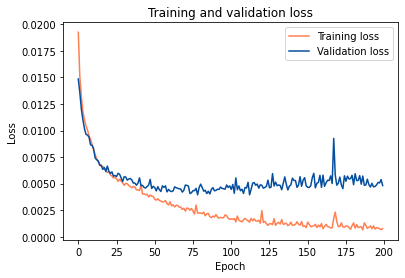

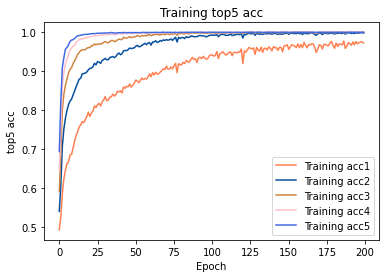

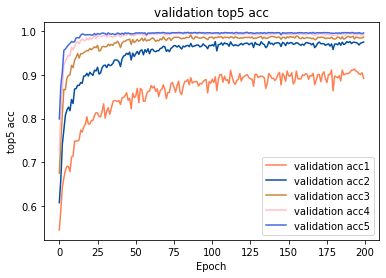

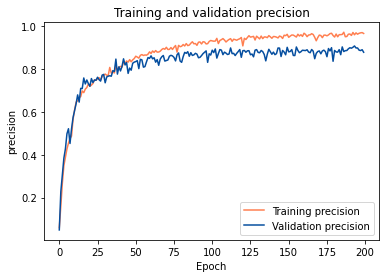

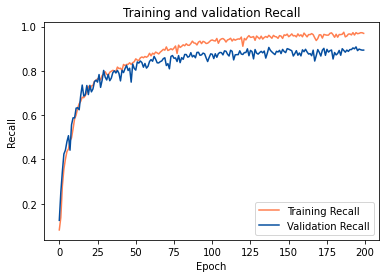

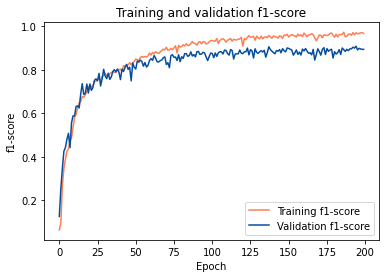

1637256162.093479


In [107]:
# training for 3 epochs
start = time.time()
print(start)
n_epochs = 200
train(alexnet, criterion, optimizer, n_epochs=n_epochs)
end = time.time()
print(end)

In [108]:
def test(alexnet, test_loader):
    '''打印给定胶囊网络的测试统计数据。
       参数capsule_net：训练好的胶囊网络
       参数 test_loader：测试数据加载器
       return：返回最后一批测试图像数据和对应的重建
       '''
    #------计算各类别的分类准确率--------------
#     # 最开始初始化为0
    classes = ['0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9', '10', '11', '12', '13','14']
    class_correct = list(0. for i in range(16))
    
#     # 初始化为0
    class_total = list(0. for i in range(16))
    
    test_loss = 0 # loss tracking
    correct, correct1, correct2, correct3, correct4, correct5 = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
    test_acc1, test_acc2, test_acc3, test_acc4, test_acc5 = 0.0, 0.0, 0.0, 0.0, 0.0
    precision, recall, f1 = 0.0, 0.0, 0.0
    test_preds = []
    test_trues = []
    
    preds = []
    trues = []
    
    count = 0
    # 模型的结构
    alexnet.eval() # eval mode

    for batch_i, (data, target) in enumerate(test_loader):
        # target: torch.Size([20, 10])
        data = data.unsqueeze(0)
        data = data.permute(1,2,0)
        target = target.squeeze()
#         target = One_hot(target)
        # 转tensor，batch_labels: torch.Size([32, 16])
#         target = torch.from_numpy(target) 
        target = target.type(torch.LongTensor)
        
        batch_size = data.size(0)

#         if TRAIN_ON_GPU:
#             images, target = images.cuda(), target.cuda()

        # forward pass: compute predicted outputs by passing inputs to the model
        logits = alexnet(data)
        
                    
            # calculate loss
        loss = criterion(logits, target)

        # update average test loss 
        test_loss += loss.item()
        
        
        target = One_hot(target)
        target = torch.from_numpy(target)
        
        # 计算AUC，绘制AUC曲线
        preds.append(logits.cpu().detach().numpy())
        trues.append(target.cpu().detach().numpy())
        
        # 计算topk准确率，k=1-5
        _, pred = logits.topk(5, 1, largest=True, sorted=True)
        _, labels = torch.max(target.data.cpu(), 1)
        _, labels1 = torch.max(target.data.cpu(), 1)
        labels = labels.view(labels.size(0), -1).expand_as(pred)
        
#         print("topk k pred:", pred)
#         print("topk k labels:", labels)
        
        count += labels.shape[0]
        correct = pred.eq(labels).float()
        correct5 += correct[:, :5].sum()
        correct4 += correct[:, :4].sum()
        correct3 += correct[:, :3].sum()
        correct2 += correct[:, :2].sum()
        correct1 += correct[:, :1].sum()
                
        #-----------计算precision、f1-score、recall--------------
        _, output = torch.max(logits.data.cpu(), 1)
#             print("train_outputs:", train_outputs)
        _, label = torch.max(target.data.cpu(), 1)
#             print("batch_labels:", batch_labels)
        test_trues.append(label.cpu().detach().numpy())
        test_preds.append(output.cpu().detach().numpy())
        
        correct = np.squeeze(output.eq(label.data.view_as(output)))
#         print("correct:", correct)
#         print(label.data[i])
        for i in range(batch_size):
            test_label = label.data[i]
#             print("test_label:", test_label)
            class_correct[test_label] +=  correct[i].item()
            class_total[test_label] += 1
        
    test_acc1 = correct1/count
    test_acc2 = correct2/count
    test_acc3 = correct3/count
    test_acc4 = correct4/count
    test_acc5 = correct5/count
    
    y_true = np.concatenate(test_trues)
    y_pred = np.concatenate(test_preds)
    
#     print("y_true:", y_true)
#     print("y_pred:", y_pred)
    
    ans = classification_report(y_true, y_pred,digits=5) # 小数点后保留5位有效数字
    print("测试集各标签分类情况：")
    print(ans)
    
    #---------各标签分类准确率------------
    for i in range(16):
        if class_total[i]>0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))
     
    precision, recall, f1 = precision_recall_fscore_support(y_true,y_pred,average='macro')[:-1]
#         val_AUC = roc_auc_score(y_val_true, y_val_preds, multi_class='ovo')
    test_loss = test_loss/len(test_loader)
    test_loss = test_loss/100.0
    print('test Loss: {:.4f} \t'.format(test_loss))
    print('test acc1: {:.4f} \t'.format(test_acc1))
    print('test acc2: {:.4f} \t'.format(test_acc2))
    print('test acc3: {:.4f} \t'.format(test_acc3))
    print('test acc4: {:.4f} \t'.format(test_acc4))
    print('test acc5: {:.4f} \t'.format(test_acc5))
    print('test precision: {:.4f} \t test recall: {:.4f} \t test f1-score: {:.4f}'.format(precision, recall, f1))
    
    preds = np.array(preds)
    preds = preds.reshape(2800, 16)
#     print("preds:", preds)
    
    trues = np.array(trues)
    trues = trues.reshape(2800, 16)
#     print("trues:", trues)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict() 
    n_classes = 16

    #compute fpr and tpr with roc_curve from the ytest true labels to the scores
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(trues[:, i], preds[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # trues.ravel()合并为一行, (38400,)
    
    #---------------计算micro average roc_auc-----------------
    fpr["micro"], tpr["micro"], _ = roc_curve(trues.ravel(), preds.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print("micro roc_auc:", roc_auc["micro"])
    
    #---------------计算macro average roc_auc-----------------
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
      # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
      # Finally average it and compute AUC
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    print("macro roc_auc:", roc_auc["macro"])
    
    colors = cycle(['blue', 'red', 'green', 'brown', 'purple', 'pink', 'orange', 'black', 'yellow', 'cyan', 'coral', 'crimson', 'darkgoldenrod', 'lavender', 'lime', 'gold'])
    class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
    
    plt.figure(figsize=(12,10))
    plt.plot(fpr["micro"], tpr["micro"],label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),color='deeppink', linestyle=':', linewidth=4)
    plt.plot(fpr["macro"], tpr["macro"],label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),color='navy', linestyle=':', linewidth=4)
    
    #-------------画ROC曲线图------------------------
    for i, color, lbl in zip(range(n_classes), colors, class_labels):
        plt.plot(fpr[i], tpr[i], color = color, lw = 1.5,
        label = 'ROC Curve of class {0} (area = {1:0.3f})'.format(lbl, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw = 2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for 16 Multi-Class Data')
    plt.legend(loc = 'lower right', prop = {'size': 9})
#     fullpath = save_plot_path.joinpath(save_plot_path.stem +'_roc_curve.png')
#     plt.savefig(fullpath)
    plt.show()
    

### fold0 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.92976   0.92574   0.92775      1387
           1    1.00000   1.00000   1.00000        69
           2    0.97297   0.93506   0.95364        77
           3    0.95122   1.00000   0.97500        78
           4    0.93333   0.95890   0.94595        73
           5    0.96000   0.86747   0.91139        83
           6    0.98750   0.90805   0.94611        87
           7    0.70930   0.87143   0.78205        70
           8    0.95098   1.00000   0.97487        97
           9    0.97333   1.00000   0.98649        73
          10    0.75472   0.87912   0.81218        91
          11    0.92958   0.97059   0.94964       136
          12    0.89565   0.90351   0.89956       114
          13    0.71717   0.60169   0.65438       118
          14    0.87324   0.94656   0.90842       131
          15    0.80412   0.67241   0.73239       116

    accuracy                        0.90821      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:164: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



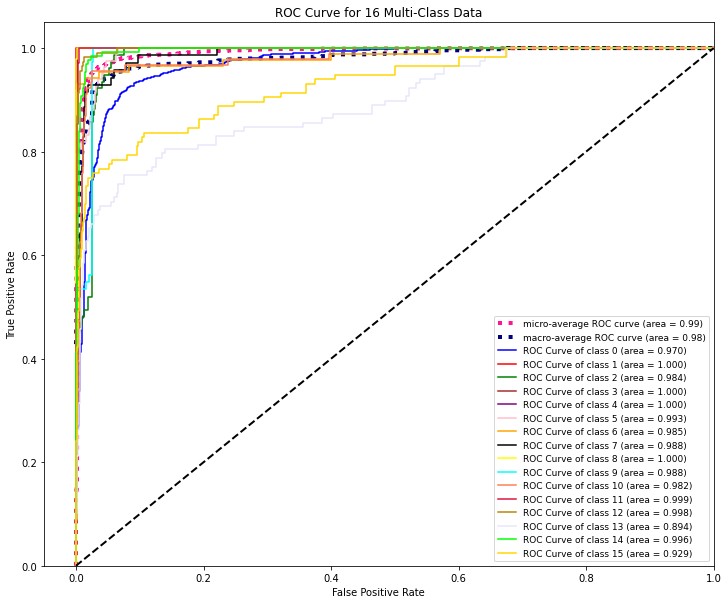

In [36]:
test(alexnet, test_loader)

### fold1(test) 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.93000   0.91819   0.92406      1418
           1    1.00000   1.00000   1.00000        82
           2    0.98667   0.90244   0.94268        82
           3    0.97590   0.94186   0.95858        86
           4    0.98795   0.97619   0.98204        84
           5    0.85870   0.92941   0.89266        85
           6    0.94521   0.97183   0.95833        71
           7    0.78082   0.79167   0.78621        72
           8    0.93056   0.94366   0.93706        71
           9    0.97701   1.00000   0.98837        85
          10    0.72727   0.74667   0.73684        75
          11    0.85366   0.94595   0.89744       111
          12    0.87903   0.98198   0.92766       111
          13    0.67857   0.56716   0.61789       134
          14    0.80153   0.91304   0.85366       115
          15    0.74336   0.71186   0.72727       118

    accuracy                        0.89750      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:164: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



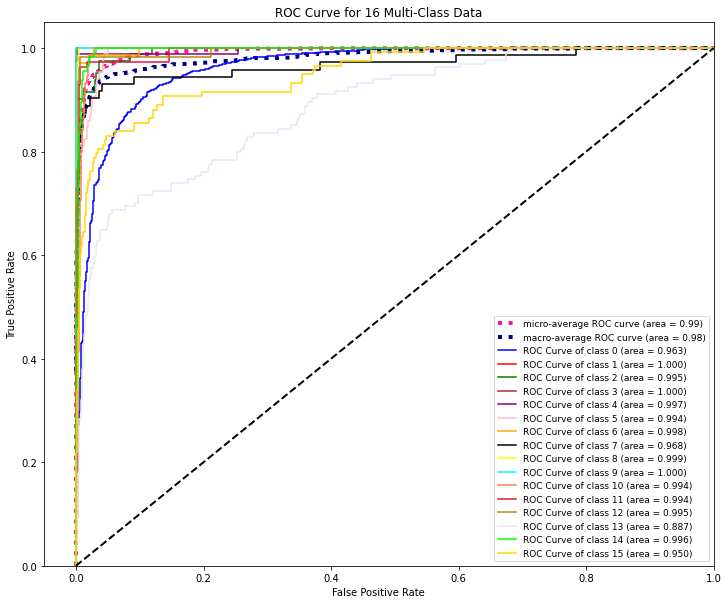

In [54]:
test(alexnet, test_loader)

### fold2(test） 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.91396   0.91927   0.91661      1375
           1    1.00000   1.00000   1.00000        85
           2    1.00000   0.93750   0.96774        80
           3    0.89744   0.94595   0.92105        74
           4    0.92857   0.95122   0.93976        82
           5    0.89655   0.86667   0.88136        90
           6    0.94937   0.92593   0.93750        81
           7    0.91781   0.73626   0.81707        91
           8    0.94792   0.97849   0.96296        93
           9    0.98795   1.00000   0.99394        82
          10    0.83673   0.58571   0.68908        70
          11    0.91935   0.96610   0.94215       118
          12    0.91200   0.85714   0.88372       133
          13    0.58407   0.56897   0.57642       116
          14    0.79832   0.87963   0.83700       108
          15    0.64626   0.77869   0.70632       122

    accuracy                        0.88929      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:164: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



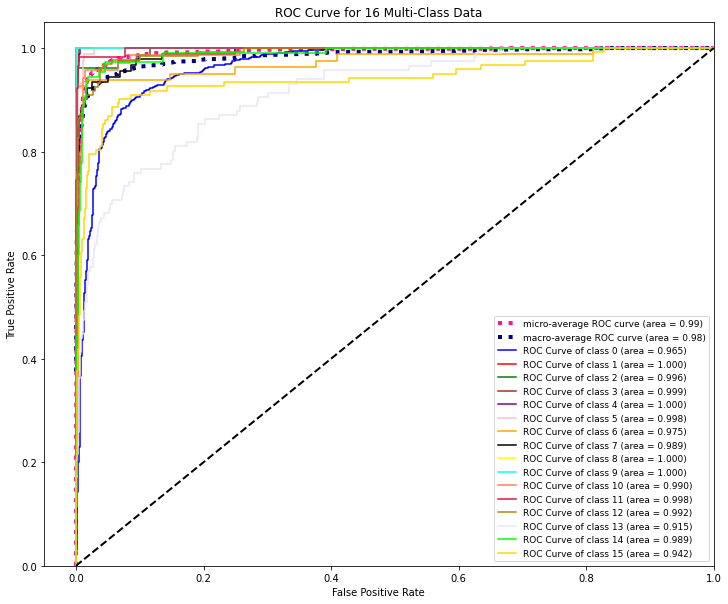

In [72]:
test(alexnet, test_loader)

### fold3(test） 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.91884   0.92285   0.92084      1374
           1    1.00000   1.00000   1.00000        93
           2    1.00000   0.91358   0.95484        81
           3    0.96429   1.00000   0.98182        81
           4    0.94318   0.98810   0.96512        84
           5    0.98507   0.86842   0.92308        76
           6    0.98780   0.93103   0.95858        87
           7    0.83333   0.83333   0.83333        84
           8    0.86486   0.98462   0.92086        65
           9    0.95294   1.00000   0.97590        81
          10    0.84416   0.70652   0.76923        92
          11    0.81600   0.89474   0.85356       114
          12    0.79861   0.89147   0.84249       129
          13    0.55660   0.53153   0.54378       111
          14    0.79389   0.83200   0.81250       125
          15    0.70755   0.60976   0.65502       123

    accuracy                        0.88607      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:164: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



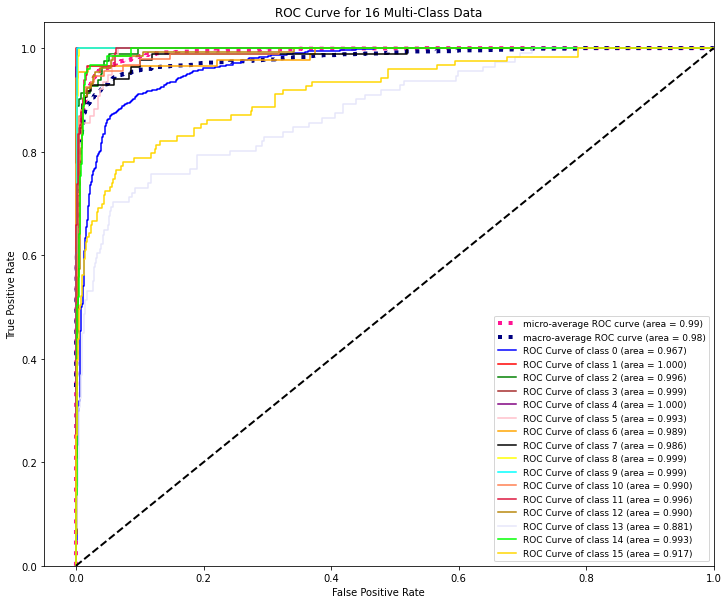

In [90]:
test(alexnet, test_loader)

### fold4(test） 

测试集各标签分类情况：
              precision    recall  f1-score   support

           0    0.94569   0.90318   0.92395      1446
           1    1.00000   1.00000   1.00000        71
           2    1.00000   0.96250   0.98089        80
           3    1.00000   0.96296   0.98113        81
           4    0.94737   0.93506   0.94118        77
           5    0.91667   0.83333   0.87302        66
           6    1.00000   0.93243   0.96503        74
           7    0.78495   0.87952   0.82955        83
           8    0.86047   1.00000   0.92500        74
           9    0.98750   1.00000   0.99371        79
          10    0.80556   0.80556   0.80556        72
          11    0.92913   0.97521   0.95161       121
          12    0.86290   0.94690   0.90295       113
          13    0.63934   0.64463   0.64198       121
          14    0.84559   0.95041   0.89494       121
          15    0.62838   0.76860   0.69145       121

    accuracy                        0.90107      2800
   macro avg  

/Users/pro/Documents/anaconda3/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:164: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



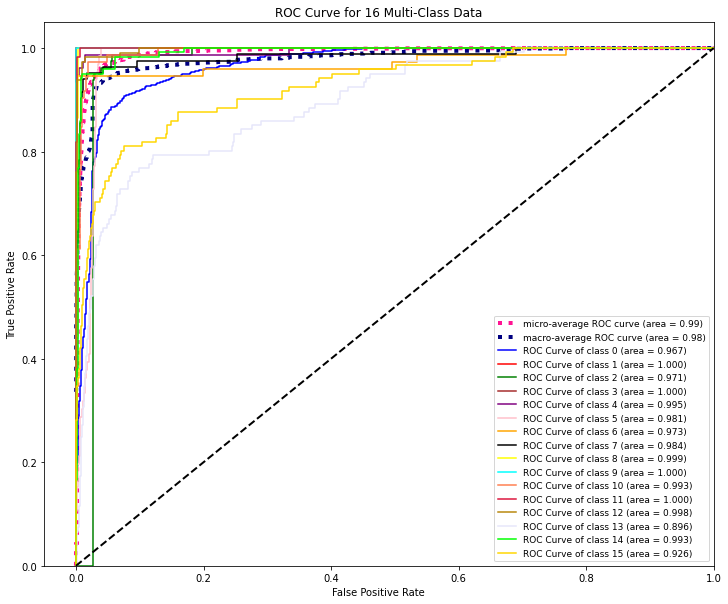

In [109]:
test(alexnet, test_loader)